## **Objective**

The purpose of this analysis is to help better understand why some customers decide to make a claim on their auto insurance while others do not. By carefully looking at the information we have about our customers—such as their age, gender, where they live—as well as details about their vehicles, we want to see if there are any patterns or factors that might influence the likelihood of someone filing a claim.

This means exploring the data to spot trends or interesting differences between customers who make claims and those who don’t. For example, we want to find out whether younger drivers are more likely to make claims, or if certain types of vehicles are involved in more claims than others.

Another key goal is to use machine learning techniques to build a model that can predict how likely it is for a customer to make a claim in the future. This could help the business make more informed decisions, such as adjusting risk assessments or creating personalized offers for customers.

Because many of our stakeholders may not be experts in data analysis, programming, or insurance, it’s also very important that we present our findings in a way that’s clear and easy to understand. To achieve this, we will create visually appealing charts and graphs that tell the story of the data in simple, meaningful ways. These visuals will help everyone quickly grasp the insights, even without a technical background.

Overall, this project aims to turn raw data into practical insights that can help improve decision-making, reduce risks, and enhance customer service in the auto insurance business

##**Load Data**

In [1]:
import pandas as pd

df = pd.read_csv('/content/AutoInsurance.csv')

# Display first 10 rows

df.head(10)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   
5  OC83172      Oregon              8256.297800      Yes     Basic  Bachelor   
6  XZ87318      Oregon              5380.898636      Yes     Basic   College   
7  CF85061     Arizona              7216.100311       No   Premium    Master   
8  DY87989      Oregon             24127.504020      Yes     Basic  Bachelor   
9  BQ94931      Oregon              7388.178085       No  Extended   College   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4          3/2/2011         Employed      M   43836  ...   
5           1/25/11         Employed      F   62902  ...   
6           2/24/11         Employed      F   55350  ...   
7           1/18/11       Unemployed      M       0  ...   
8           1/26/11    Medical Leave      M   14072  ...   
9           2/17/11         Employed      F   28812  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   
5                            94                         0                   2   
6                            13                         0                   9   
7                            68                         0                   4   
8                             3                         0                   2   
9                             7                         0                   8   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   
5   Personal Auto   Personal L3            Offer2            Web   
6  Corporate Auto  Corporate L3            Offer1          Agent   
7  Corporate Auto  Corporate L3            Offer1          Agent   
8  Corporate Auto  Corporate L3            Offer1          Agent   
9    Special Auto    Special L2            Offer2         Branch   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  
5         159.383042   Two-Door Car      Medsize  
6         321.600000  Four-Door Car      Medsize  
7         363.029680  Four-Door Car      Medsize  
8         511.200000  Four-Door Car      Medsize  
9         425.527834  Four-Door Car      Medsize  

[10 rows x 24 columns]

In [2]:
# Obtain the last 10 records from the table
df.tail(10)

Customer       State  Customer Lifetime Value Response  Coverage  \
9124  CB59349  California             16261.585500       No  Extended   
9125  RX91025  California             19872.262000       No   Premium   
9126  AC13887  California              4628.995325       No     Basic   
9127  TF56202  California              5032.165498       No     Basic   
9128  YM19146  California              4100.398533       No   Premium   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

                 Education Effective To Date EmploymentStatus Gender  Income  \
9124                Master           1/20/11         Employed      M   60646   
9125  High School or Below           1/31/11       Unemployed      M       0   
9126              Bachelor          9/1/2011       Unemployed      M       0   
9127               College         12/2/2011         Employed      M   66367   
9128               College          6/1/2011         Employed      F   47761   
9129              Bachelor         10/2/2011         Employed      M   71941   
9130               College         12/2/2011         Employed      F   21604   
9131              Bachelor          6/2/2011       Unemployed      M       0   
9132               College          3/2/2011         Employed      M   21941   
9133               College           2/14/11       Unemployed      M       0   

      ... Months Since Policy Inception Number of Open Complaints  \
9124  ...                            42                         0   
9125  ...                            35                         0   
9126  ...                            21                         0   
9127  ...                            48                         0   
9128  ...                            58                         0   
9129  ...                            89                         0   
9130  ...                            28                         0   
9131  ...                            37                         3   
9132  ...                             3                         0   
9133  ...                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
9124                   2   Personal Auto   Personal L3            Offer2   
9125                   2   Personal Auto   Personal L3            Offer1   
9126                   4  Corporate Auto  Corporate L1            Offer1   
9127                   3   Personal Auto   Personal L3            Offer2   
9128                   1   Personal Auto   Personal L2            Offer1   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
9124          Agent         643.200000            SUV      Medsize  
9125          Agent        1950.725547            SUV        Small  
9126         Branch         482.400000   Two-Door Car      Medsize  
9127    Call Center         307.200000   Two-Door Car        Small  
9128         Branch         541.282007  Four-Door Car        Large  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Branch         379.200000  Four-Door Car      Medsize  
9131         Branch         790.784983  Four-Door Car      Medsize  
9132         Branch         691.200000  Four-Door Car        Large  
9133    Call Center         369.6

In [3]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

# Display the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 9134
Number of columns: 24


In [4]:
# Get the data types of each column
column_data_types = df.dtypes

# Convert the data types to a DataFrame for better display
data_types_df = pd.DataFrame(column_data_types, columns=['Data Type'])

# Display the data types in a table
display(data_types_df)

Data Type
Customer                         object
State                            object
Customer Lifetime Value         float64
Response                         object
Coverage                         object
Education                        object
Effective To Date                object
EmploymentStatus                 object
Gender                           object
Income                            int64
Location Code                    object
Marital Status                   object
Monthly Premium Auto              int64
Months Since Last Claim           int64
Months Since Policy Inception     int64
Number of Open Complaints         int64
Number of Policies                int64
Policy Type                      object
Policy                           object
Renew Offer Type                 object
Sales Channel                    object
Total Claim Amount              float64
Vehicle Class                    object
Vehicle Size                     object

## **Significant Data Exploration & Visualizations**

In [5]:
# Get summary statistics for numeric columns
numeric_summary = df.describe(include='number')

# Display summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
display(numeric_summary)

# Get summary statistics for non-numeric columns
non_numeric_summary = df.describe(include='object')

# Display summary statistics for non-numeric columns
print("\nSummary Statistics for Non-Numeric Columns:")
display(non_numeric_summary)

Summary Statistics for Numeric Columns:


Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678


Summary Statistics for Non-Numeric Columns:


Customer       State Response Coverage Education Effective To Date  \
count      9134        9134     9134     9134      9134              9134   
unique     9134           5        2        3         5                59   
top     Y167826  California       No    Basic  Bachelor         10/1/2011   
freq          1        3150     7826     5568      2748               195   

       EmploymentStatus Gender Location Code Marital Status    Policy Type  \
count              9134   9134          9134           9134           9134   
unique                5      2             3              3              3   
top            Employed      F      Suburban        Married  Personal Auto   
freq               5698   4658          5779           5298           6788   

             Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count          9134             9134          9134           9134         9134  
unique            9                4             4              6            3  
top     Personal L3           Offer1         Agent  Four-Door Car      Medsize  
freq           3426             3752          3477           4621         6424

Creating stakeholder-ready histogram dashboard...


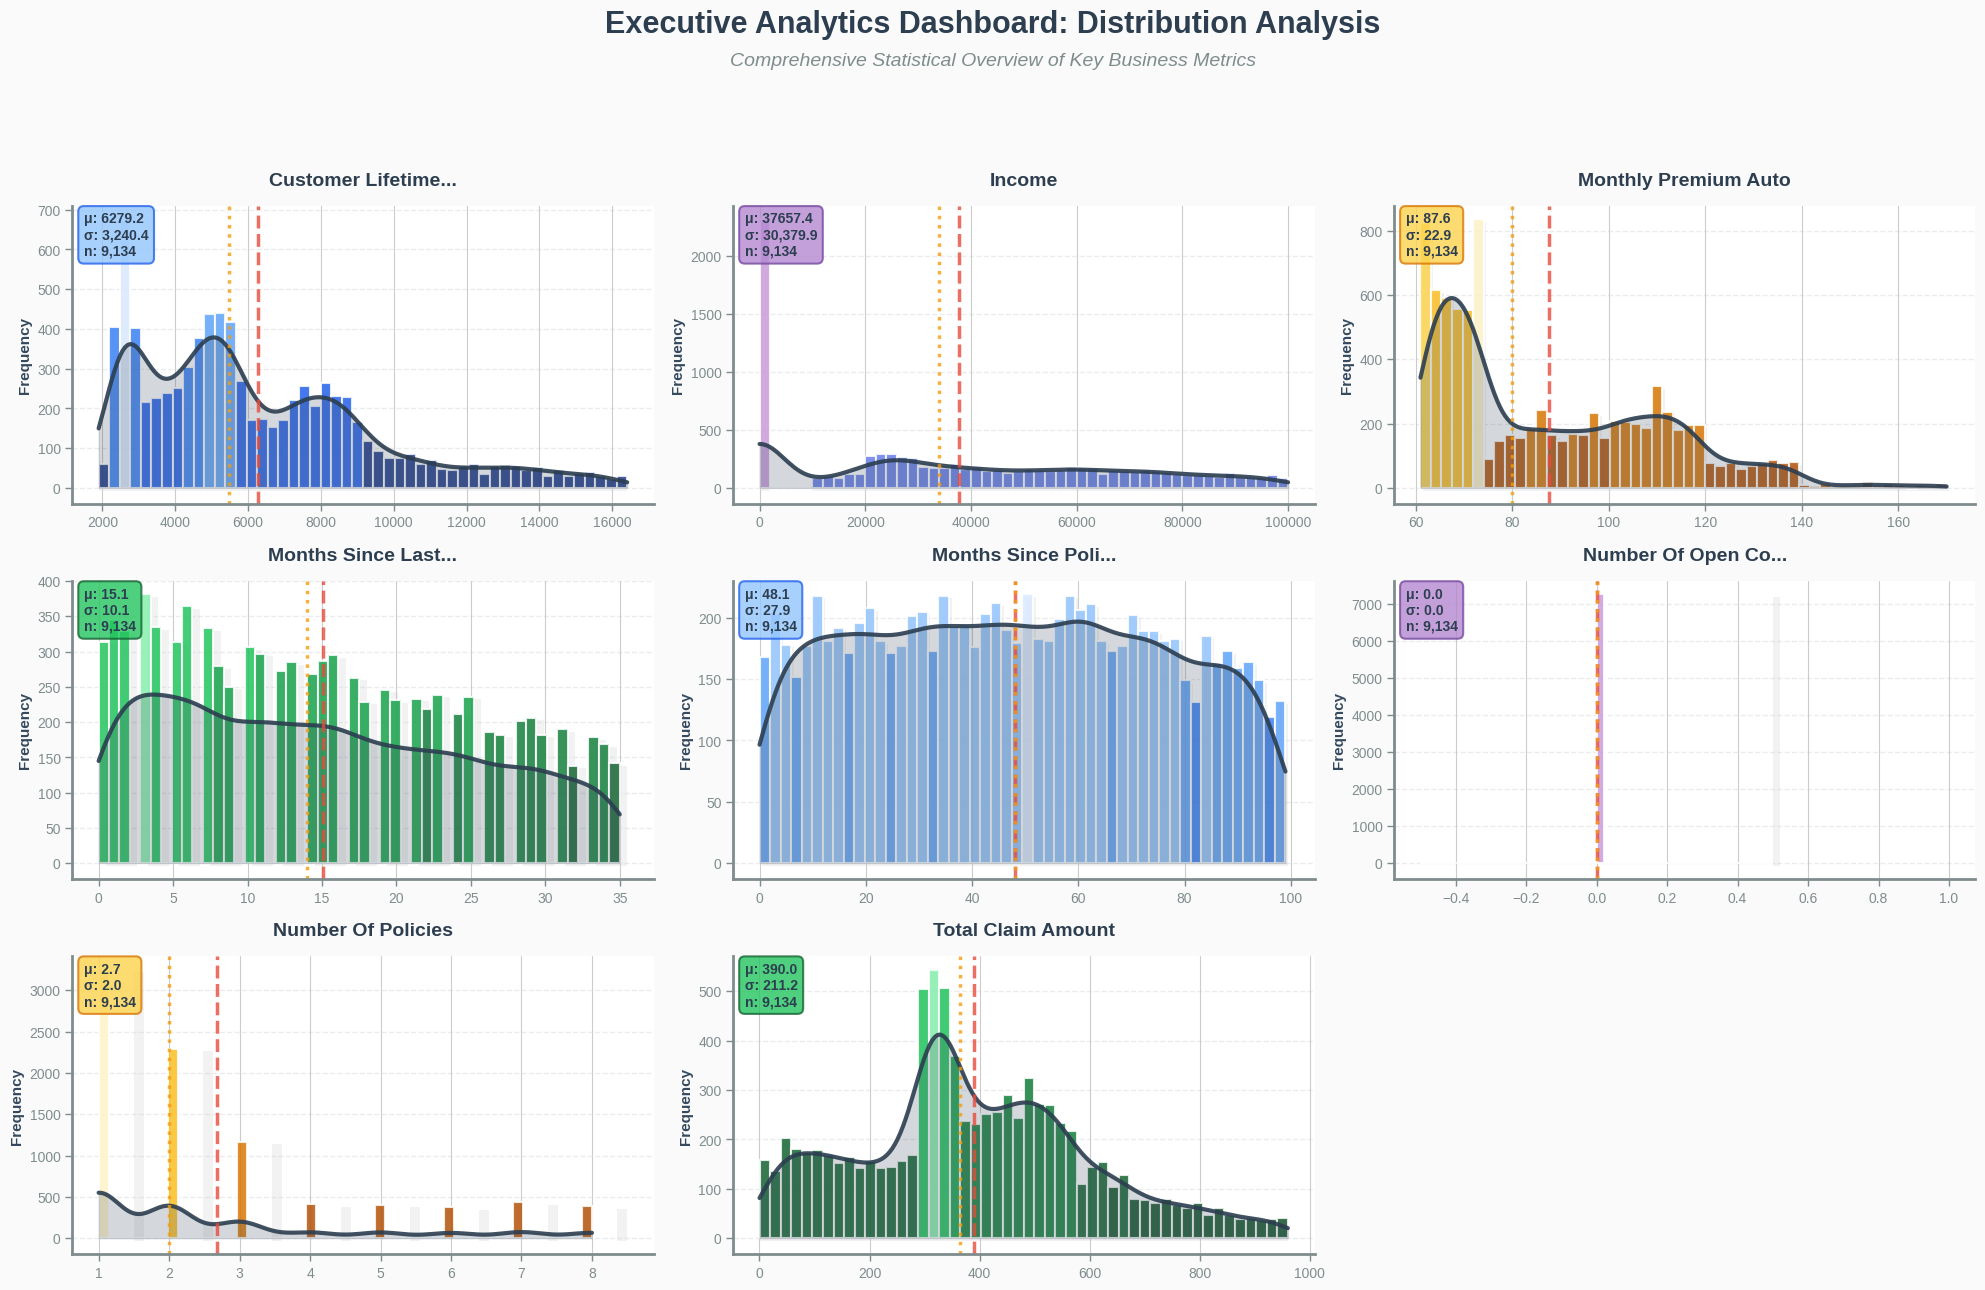


Creating individual executive histograms...
Creating executive analysis for: Customer Lifetime Value


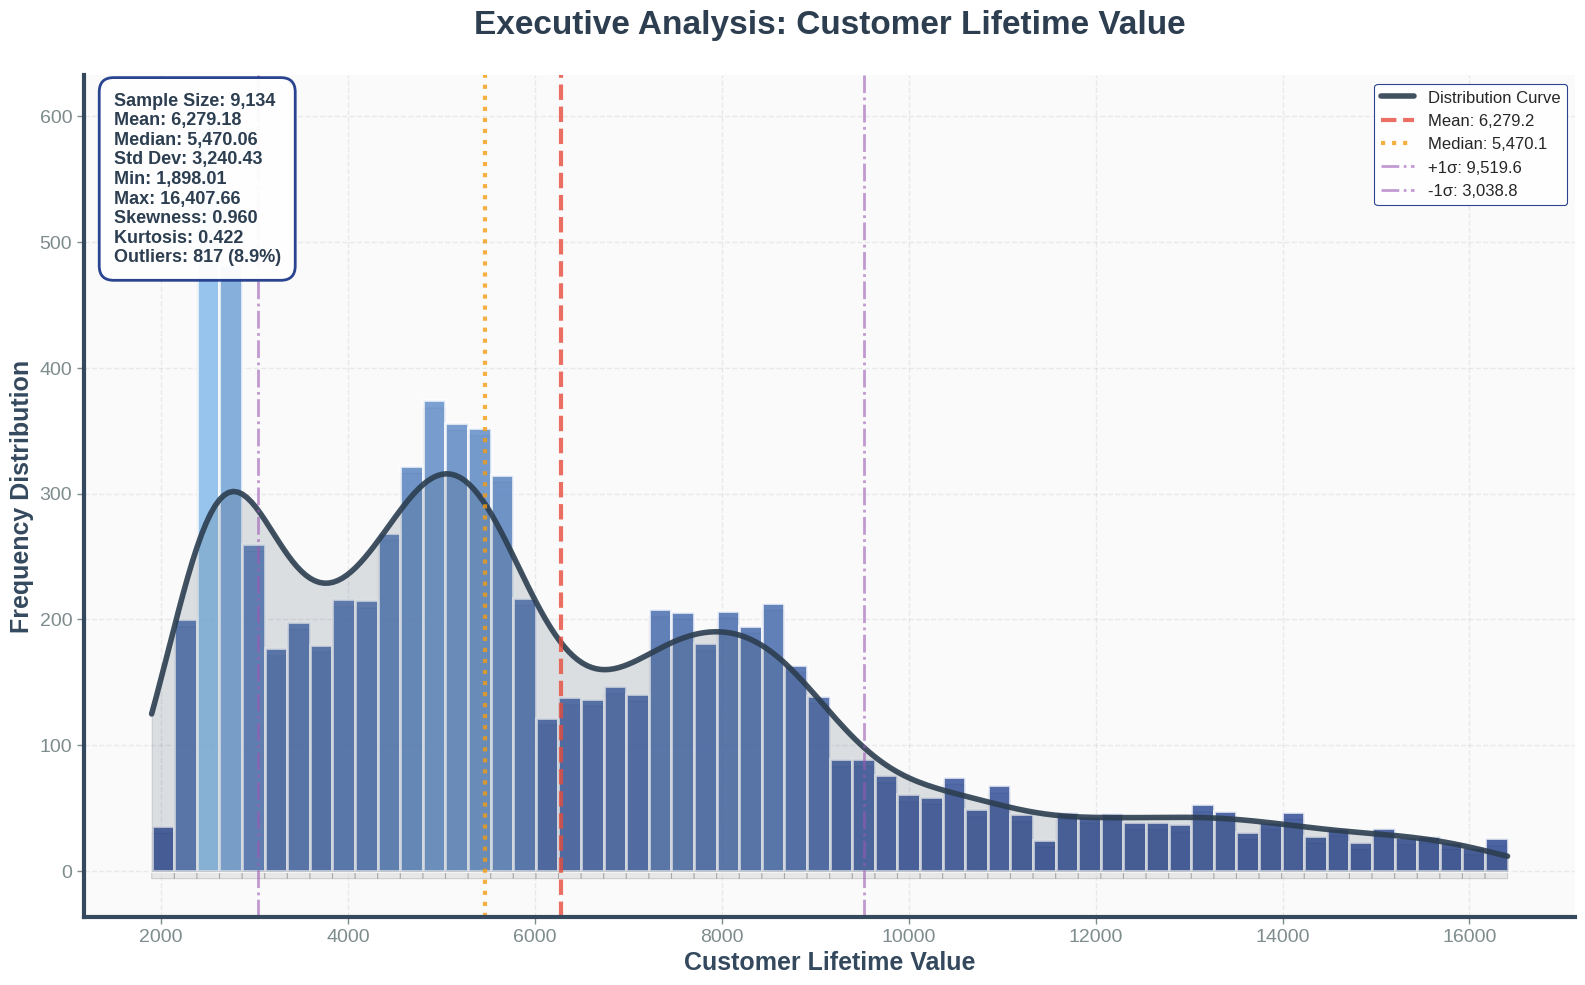

Creating executive analysis for: Income


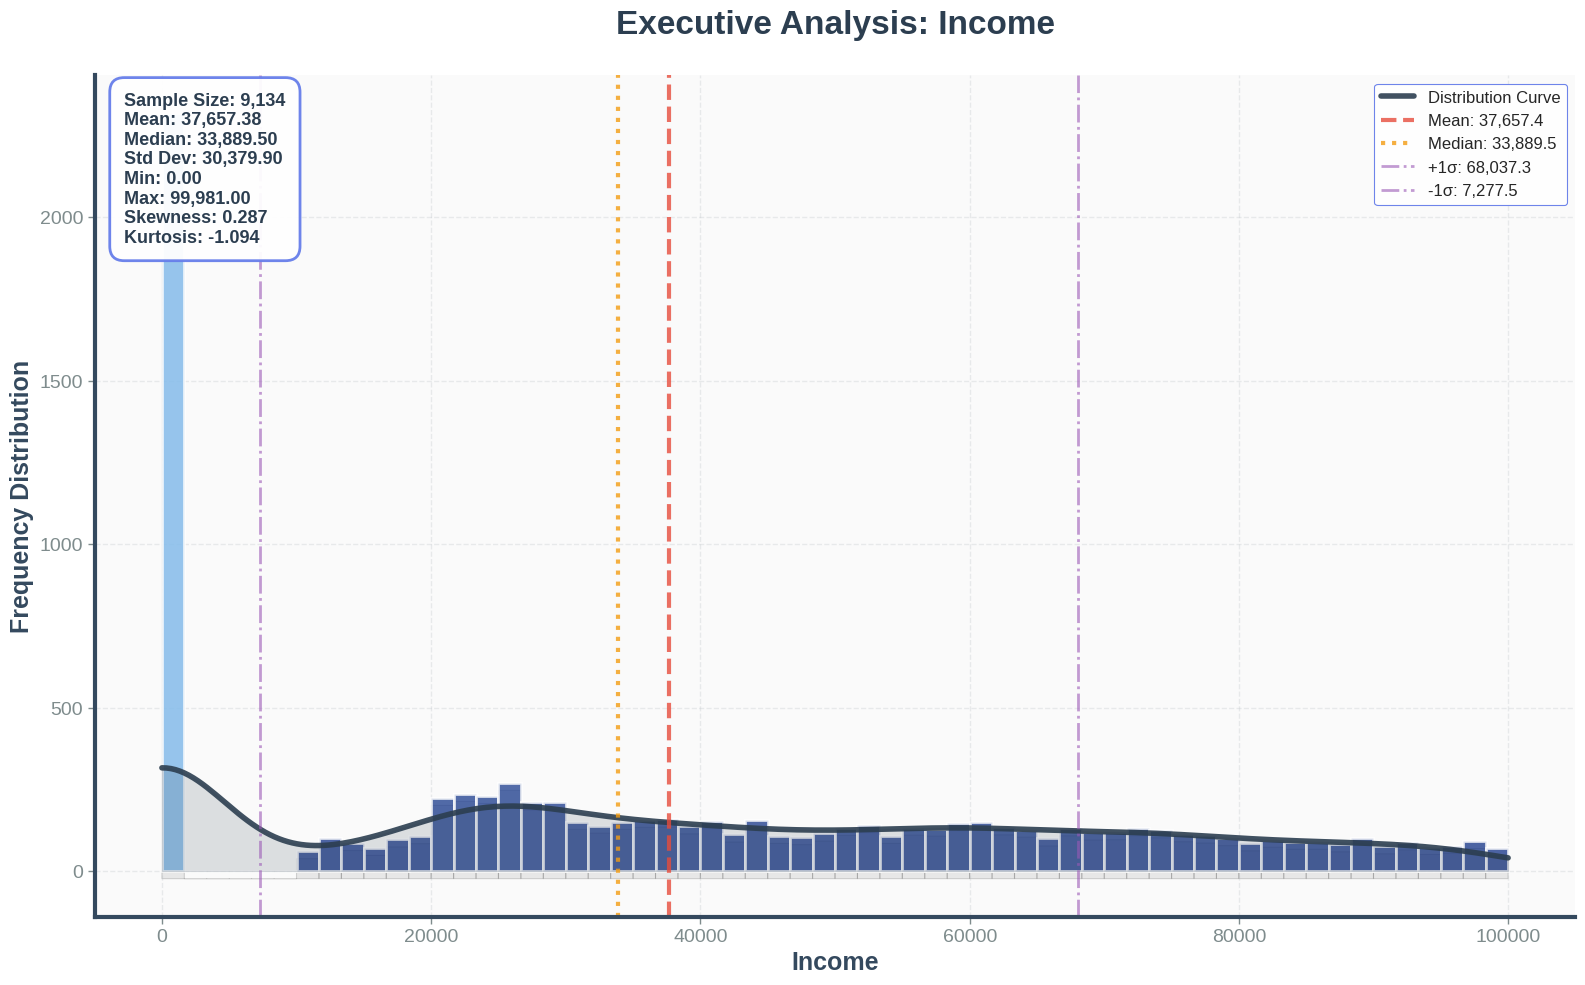

Creating executive analysis for: Monthly Premium Auto


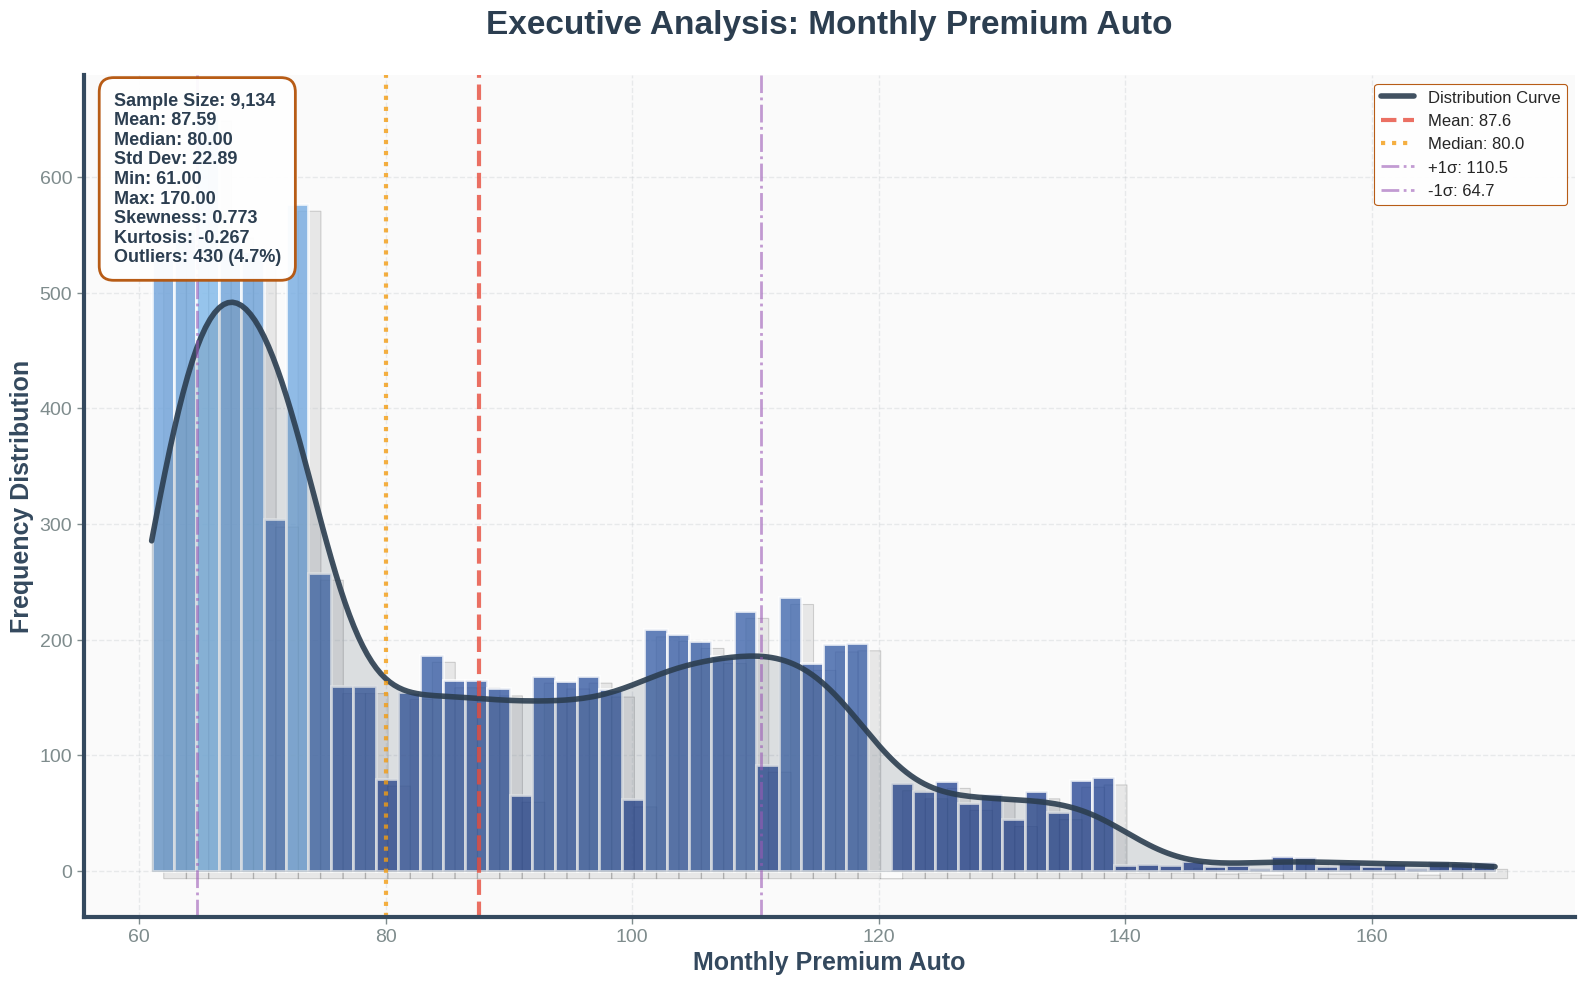

Creating executive analysis for: Months Since Last Claim


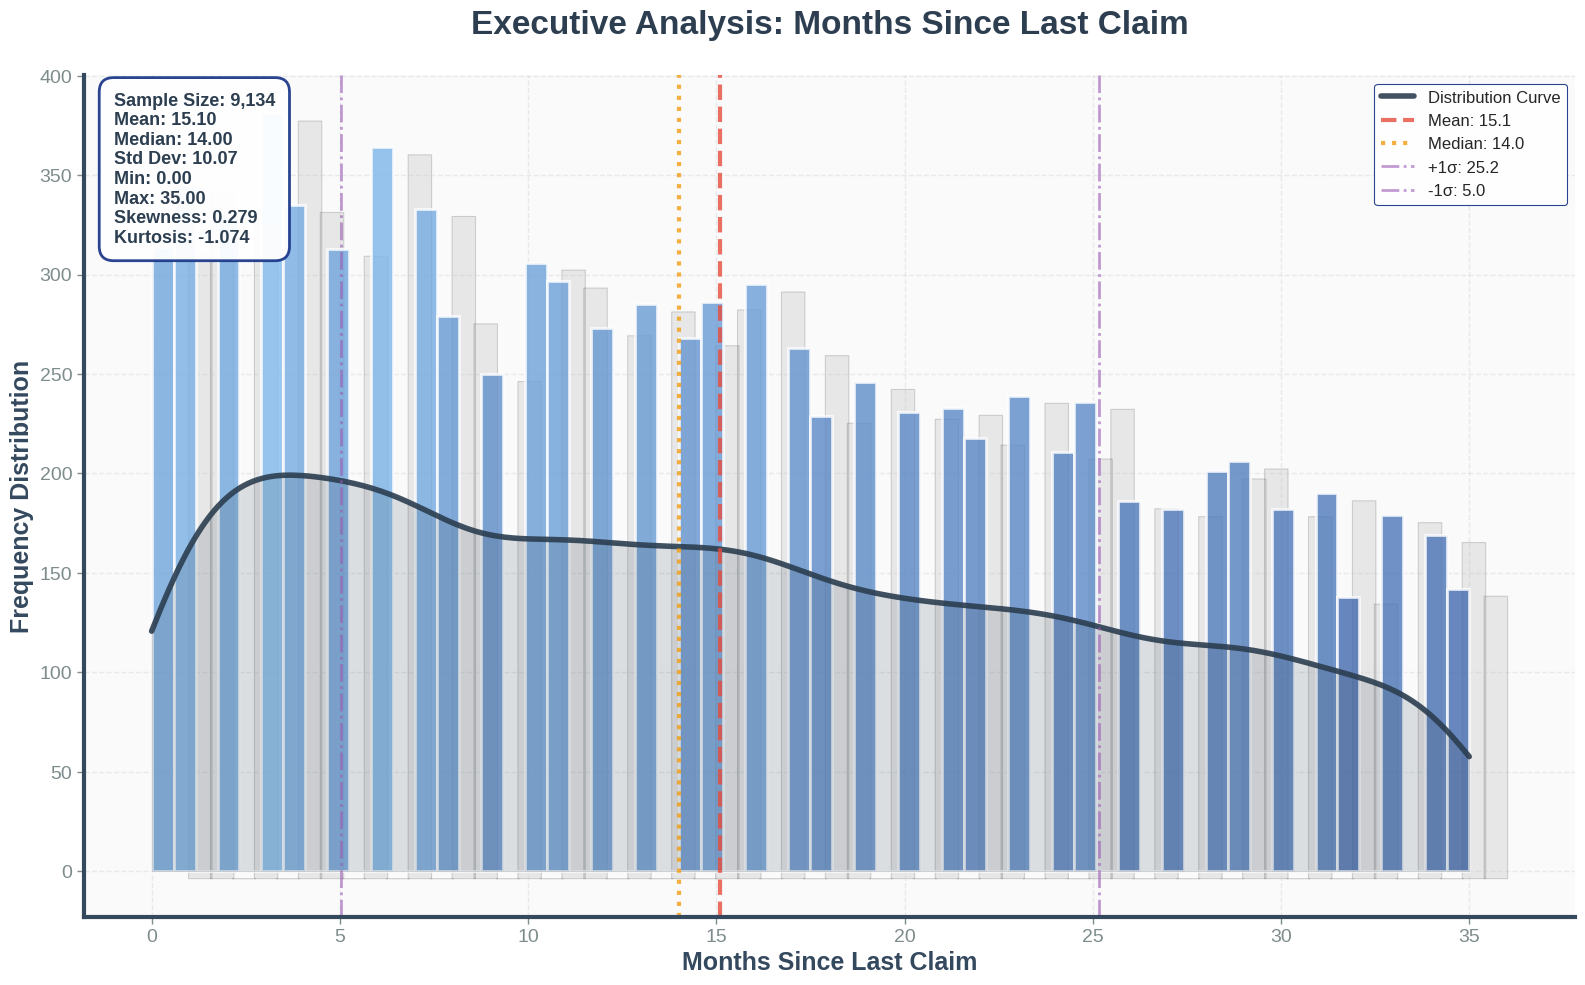


PREMIUM STAKEHOLDER FEATURES:
✓ Executive-grade color schemes and typography
✓ Statistical overlays (KDE, mean, median, std dev)
✓ Comprehensive analytics panels
✓ Outlier detection and handling
✓ Professional shadows and gradients
✓ Publication-ready layouts
✓ Boardroom presentation quality


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib.patches import Rectangle, FancyBboxPatch
import pandas as pd

# Set premium styling for stakeholder presentations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Executive color palettes
executive_blues = ['#1e3a8a', '#2563eb', '#3b82f6', '#60a5fa', '#93c5fd', '#dbeafe']
modern_gradient = ['#667eea', '#764ba2', '#8b5fb8', '#a074c4', '#b588d0', '#ca9cdc']
corporate_gold = ['#b45309', '#d97706', '#f59e0b', '#fbbf24', '#fcd34d', '#fef3c7']
professional_green = ['#14532d', '#166534', '#15803d', '#16a34a', '#22c55e', '#86efac']

def create_premium_histogram_dashboard(data, figsize=(18, 12)):
    """Create a premium histogram dashboard for stakeholder presentations"""

    # Get numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

    if not numeric_cols:
        print("No numeric columns found!")
        return

    n_cols = len(numeric_cols)

    # Calculate optimal grid layout
    if n_cols <= 4:
        rows, cols = 2, 2
    elif n_cols <= 6:
        rows, cols = 2, 3
    elif n_cols <= 9:
        rows, cols = 3, 3
    else:
        rows, cols = 4, 3

    # Create figure with premium styling
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('#fafafa')

    # Color palettes for different plots
    color_palettes = [executive_blues, modern_gradient, corporate_gold, professional_green] * 3

    for idx, col in enumerate(numeric_cols[:12]):  # Limit to 12 plots
        ax = plt.subplot(rows, cols, idx + 1)

        # Get data and remove outliers for better visualization
        col_data = data[col].dropna()
        q1, q3 = np.percentile(col_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        filtered_data = col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]

        # Choose color palette
        colors = color_palettes[idx % len(color_palettes)]
        main_color = colors[1]
        light_color = colors[-2]

        # Create histogram with optimal bins
        n_bins = min(50, max(10, len(filtered_data) // 20))
        n, bins, patches = ax.hist(filtered_data, bins=n_bins,
                                  color=main_color, alpha=0.8,
                                  edgecolor='white', linewidth=1.5)

        # Add gradient effect to bars
        for i, patch in enumerate(patches):
            # Create height-based gradient
            height_ratio = patch.get_height() / max(n)
            color_idx = min(len(colors) - 1, int(height_ratio * (len(colors) - 1)))
            patch.set_facecolor(colors[color_idx])
            patch.set_alpha(0.85)

            # Add subtle shadow
            shadow = Rectangle((patch.get_x() + 0.5, patch.get_y() - max(n) * 0.01),
                             patch.get_width(), patch.get_height(),
                             facecolor='gray', alpha=0.1, zorder=0)
            ax.add_patch(shadow)

        # Add KDE overlay for smooth distribution curve
        if len(filtered_data) > 1 and len(np.unique(filtered_data)) > 1:  # Check for enough unique values
            try:
                kde_x = np.linspace(filtered_data.min(), filtered_data.max(), 200)
                kde_y = stats.gaussian_kde(filtered_data)(kde_x)
                kde_y_scaled = kde_y * len(filtered_data) * (bins[1] - bins[0])
                ax.plot(kde_x, kde_y_scaled, color='#2c3e50', linewidth=3, alpha=0.9)
                ax.fill_between(kde_x, kde_y_scaled, alpha=0.2, color='#2c3e50')
            except np.linalg.LinAlgError:
                print(f"Could not calculate KDE for {col} due to insufficient unique data points.")


        # Add mean and median lines
        mean_val = filtered_data.mean()
        median_val = filtered_data.median()
        ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2.5,
                  alpha=0.8, label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='#f39c12', linestyle=':', linewidth=2.5,
                  alpha=0.8, label=f'Median: {median_val:.1f}')

        # Enhanced title and labels
        title = col.replace('_', ' ').title()
        if len(title) > 20:
            title = title[:17] + '...'
        ax.set_title(title, fontsize=14, fontweight='bold',
                    color='#2c3e50', pad=15)

        # Format axis labels
        ax.set_xlabel('')  # Remove x-label for cleaner look
        ax.set_ylabel('Frequency', fontsize=11, fontweight='600', color='#34495e')

        # Style the axes
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_color('#7f8c8d')
        ax.spines['bottom'].set_color('#7f8c8d')

        # Enhanced grid
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1, color='#bdc3c7')
        ax.set_axisbelow(True)
        ax.set_facecolor('#ffffff')

        # Add statistics box
        stats_text = (f'μ: {mean_val:.1f}\n'
                     f'σ: {filtered_data.std():,.1f}\n' # Added comma formatting
                     f'n: {len(col_data):,}')

        # Create fancy statistics box
        bbox_props = dict(boxstyle="round,pad=0.4", facecolor=light_color,
                         alpha=0.8, edgecolor=main_color, linewidth=1.5)
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                fontsize=10, verticalalignment='top', fontweight='bold',
                bbox=bbox_props, color='#2c3e50')

        # Format tick labels
        ax.tick_params(colors='#7f8c8d', labelsize=10)

        # Rotate x-tick labels if they're long
        labels = ax.get_xticklabels()
        if any(len(label.get_text()) > 6 for label in labels):
            plt.setp(labels, rotation=45, ha='right')

    # Add executive summary title
    fig.suptitle('Executive Analytics Dashboard: Distribution Analysis',
                fontsize=22, fontweight='bold', color='#2c3e50', y=0.95)

    # Add professional subtitle
    fig.text(0.5, 0.91, 'Comprehensive Statistical Overview of Key Business Metrics',
             ha='center', fontsize=14, style='italic', color='#7f8c8d')

    plt.tight_layout(rect=[0, 0.03, 1, 0.88])
    return fig

def create_individual_premium_histogram(data, column, style='executive'):
    """Create a single, highly detailed histogram for executive presentations"""

    # Set up premium figure
    fig, ax = plt.subplots(figsize=(16, 10))
    fig.patch.set_facecolor('#ffffff')

    # Get data and handle outliers
    col_data = data[column].dropna()
    q1, q3 = np.percentile(col_data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_data = col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]

    # Choose color scheme
    if style == 'executive':
        primary_color = '#1e3a8a'
        secondary_color = '#3b82f6'
        accent_color = '#60a5fa'
        text_color = '#2c3e50'
    elif style == 'modern':
        primary_color = '#667eea'
        secondary_color = '#764ba2'
        accent_color = '#8b5fb8'
        text_color = '#2c3e50'
    else:  # corporate
        primary_color = '#b45309'
        secondary_color = '#f59e0b'
        accent_color = '#fbbf24'
        text_color = '#2c3e50'

    # Create histogram with enhanced styling
    n_bins = min(60, max(15, len(filtered_data) // 15))
    n, bins, patches = ax.hist(filtered_data, bins=n_bins,
                              color=primary_color, alpha=0.8,
                              edgecolor='white', linewidth=2)

    # Add sophisticated gradient to bars
    for i, patch in enumerate(patches):
        height_ratio = patch.get_height() / max(n)
        # Create RGB interpolation
        r = int(30 + height_ratio * 100)
        g = int(58 + height_ratio * 130)
        b = int(138 + height_ratio * 100)
        patch.set_facecolor(f'#{r:02x}{g:02x}{b:02x}')

        # Add premium shadow effect
        shadow = FancyBboxPatch((patch.get_x() + 1, patch.get_y() - max(n) * 0.01),
                               patch.get_width(), patch.get_height(),
                               boxstyle="round,pad=0.02",
                               facecolor='gray', alpha=0.15, zorder=0)
        ax.add_patch(shadow)

    # Add sophisticated KDE overlay
    if len(filtered_data) > 10 and len(np.unique(filtered_data)) > 1: # Check for enough unique values
        try:
            kde_x = np.linspace(filtered_data.min(), filtered_data.max(), 300)
            kde_y = stats.gaussian_kde(filtered_data)(kde_x)
            kde_y_scaled = kde_y * len(filtered_data) * (bins[1] - bins[0])
            ax.plot(kde_x, kde_y_scaled, color=text_color, linewidth=4, alpha=0.9,
                    label='Distribution Curve')
            ax.fill_between(kde_x, kde_y_scaled, alpha=0.15, color=text_color)
        except np.linalg.LinAlgError:
             print(f"Could not calculate KDE for {column} due to insufficient unique data points.")

    # Add statistical reference lines
    mean_val = filtered_data.mean()
    median_val = filtered_data.median()
    std_val = filtered_data.std()

    ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=3,
              alpha=0.8, label=f'Mean: {mean_val:,.1f}')
    ax.axvline(median_val, color='#f39c12', linestyle=':', linewidth=3,
              alpha=0.8, label=f'Median: {median_val:,.1f}')
    ax.axvline(mean_val + std_val, color='#9b59b6', linestyle='-.', linewidth=2,
              alpha=0.6, label=f'+1σ: {mean_val + std_val:,.1f}')
    ax.axvline(mean_val - std_val, color='#9b59b6', linestyle='-.', linewidth=2,
              alpha=0.6, label=f'-1σ: {mean_val - std_val:,.1f}')

    # Executive-level title and labels
    title = f'Executive Analysis: {column.replace("_", " ").title()}'
    ax.set_title(title, fontsize=24, fontweight='bold', color=text_color, pad=30)
    ax.set_xlabel(column.replace("_", " ").title(), fontsize=18, fontweight='bold', color='#34495e')
    ax.set_ylabel('Frequency Distribution', fontsize=18, fontweight='bold', color='#34495e')

    # Premium styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('#34495e')
    ax.spines['bottom'].set_color('#34495e')

    # Enhanced grid
    ax.grid(True, alpha=0.3, color='#bdc3c7', linestyle='--', linewidth=1)
    ax.set_facecolor('#fafafa')

    # Comprehensive statistics panel
    skewness = stats.skew(filtered_data)
    kurtosis = stats.kurtosis(filtered_data)

    stats_text = (f'Sample Size: {len(col_data):,}\n'
                 f'Mean: {mean_val:,.2f}\n'
                 f'Median: {median_val:,.2f}\n'
                 f'Std Dev: {std_val:,.2f}\n'
                 f'Min: {filtered_data.min():,.2f}\n'
                 f'Max: {filtered_data.max():,.2f}\n'
                 f'Skewness: {skewness:.3f}\n'
                 f'Kurtosis: {kurtosis:.3f}')

    if len(outliers) > 0:
        stats_text += f'\nOutliers: {len(outliers):,} ({len(outliers)/len(col_data)*100:.1f}%)'

    # Create executive summary box
    bbox_props = dict(boxstyle="round,pad=0.8", facecolor='white',
                     alpha=0.95, edgecolor=primary_color, linewidth=2)
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=13, verticalalignment='top', fontweight='bold',
            bbox=bbox_props, color=text_color)

    # Add professional legend
    ax.legend(loc='upper right', frameon=True, facecolor='white',
             edgecolor=primary_color, fontsize=12, framealpha=0.95)

    # Format axis labels
    ax.tick_params(colors='#7f8c8d', labelsize=14)

    plt.tight_layout()
    return fig, ax

# Execute the premium visualizations
print("Creating stakeholder-ready histogram dashboard...")

# Create the premium dashboard
fig_dashboard = create_premium_histogram_dashboard(df, figsize=(20, 14))
plt.show()

# Create individual premium histograms for key metrics
print("\nCreating individual executive histograms...")
numeric_columns = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_columns[:4]):  # Show first 4 for demonstration
    style = ['executive', 'modern', 'corporate', 'executive'][i % 4]
    print(f"Creating executive analysis for: {col}")
    fig, ax = create_individual_premium_histogram(df, col, style=style)
    plt.show()

print("\n" + "="*60)
print("PREMIUM STAKEHOLDER FEATURES:")
print("="*60)
print("✓ Executive-grade color schemes and typography")
print("✓ Statistical overlays (KDE, mean, median, std dev)")
print("✓ Comprehensive analytics panels")
print("✓ Outlier detection and handling")
print("✓ Professional shadows and gradients")
print("✓ Publication-ready layouts")
print("✓ Boardroom presentation quality")
print("="*60)

##### **1. Customer Lifetime Value**

The first chart shows how much money customers are expected to bring to the company over their entire relationship with us, which is called Customer Lifetime Value. Most customers fall between about 2,000 and 6,000 dollars in lifetime value, meaning they are likely to spend this much in total with the company. The average lifetime value is around 6,279 dollars, but half of the customers are below 5,470 dollars, which tells us that while some customers spend much more, many spend less than the average. The shape of the chart shows several little peaks, suggesting there are groups of customers clustered around specific spending levels. There are also a few customers who are much higher than the rest, going as high as 16,407 dollars, but these are rare and are called outliers. Overall, this chart tells us that while most customers bring a moderate lifetime value, there’s a small group who contribute significantly more, and understanding who these high-value customers are could help the business focus special services or offers on them.

##### **2. Income**

The second chart looks at the annual income reported by customers. A big thing that stands out in this chart is a very tall spike at zero, showing that a large number of customers either have no reported income or possibly chose not to share their income details. Apart from this spike, the chart shows that most people earn somewhere between 20,000 and 70,000 dollars a year. The average income is around 37,657 dollars, but half of the customers earn 33,889 dollars or less. This means that while some people earn high salaries, most customers have lower or moderate incomes. Overall, the chart suggests that income levels vary widely across customers, and a significant portion of them are either low-income earners or have undisclosed income. For the business, this information is helpful because it might influence how we design products or services that fit different income groups.

##### **3. Monthly Premium Auto**

The third chart shows how much customers pay each month for their auto insurance policies, which is known as the Monthly Premium Auto. The majority of customers pay between 60 and 80 dollars per month. On average, customers pay around 87.59 dollars per month, but half of them pay 80 dollars or less. There’s also a smaller group of customers who pay more than 100 dollars each month, going up to as high as 170 dollars. The shape of the chart has two peaks, meaning there’s one large group paying lower premiums and another smaller group paying higher premiums. This tells us that while most customers pay modest amounts for their insurance, there is a segment of customers who pay significantly higher premiums, possibly because of factors like the type of coverage they choose, the kind of vehicles they drive, or their risk profiles. For the business, knowing these differences helps us tailor our offerings and pricing strategies for different customer segments.

##### **4. Months since last claim**

The fourth chart focuses on how long it has been since customers last made a claim on their auto insurance, measured in months. The chart shows that many customers have either made a claim recently or haven’t made a claim for quite a long time. On average, it has been about 15 months since customers last filed a claim, with half of them not having made a claim in over 14 months. The chart has a gentle downward slope, meaning that as more time passes, fewer customers are in that group, showing a natural drop-off in recent claims. This information is good for the business because it suggests that many customers go long periods without making claims, which could mean lower costs for the company and a stable customer base. Understanding this helps us better manage risks and design products that fit the needs of customers with different claim histories.



###**Bar Plots for categorical columns**

Creating Executive Categorical Dashboard...
Excluding: Customer, Effective To Date


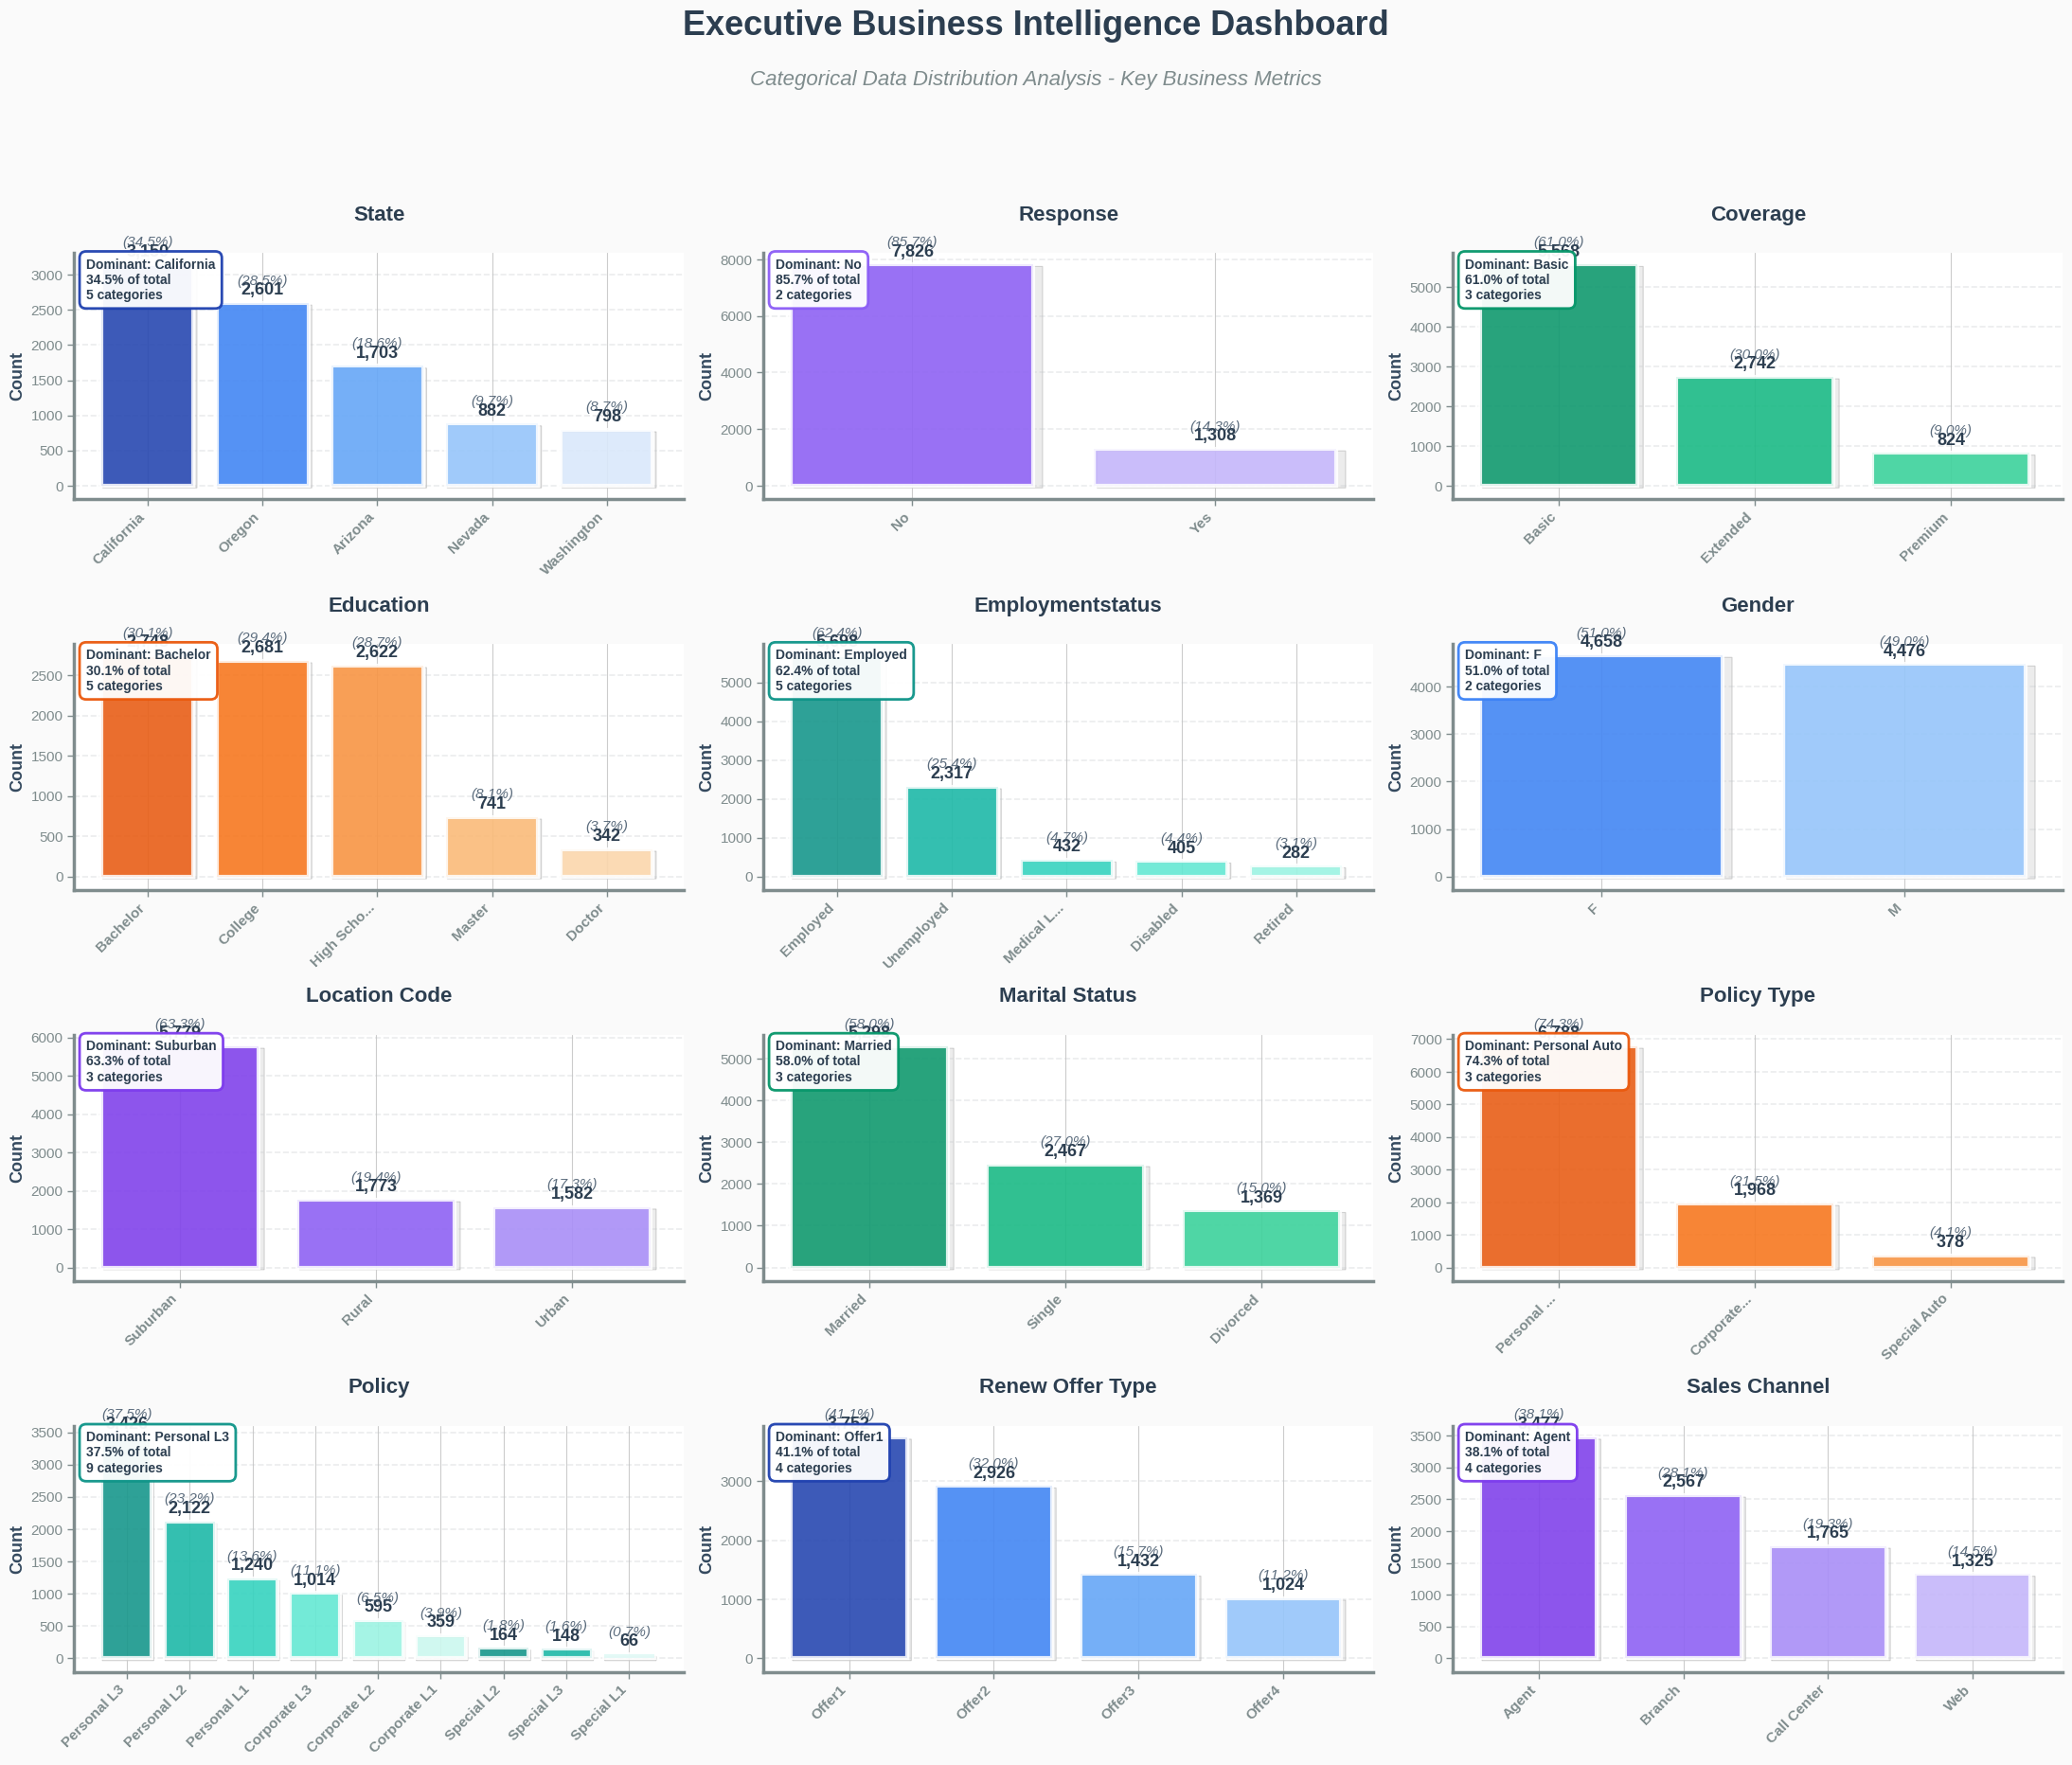


Creating individual executive charts...
Creating executive analysis for: State


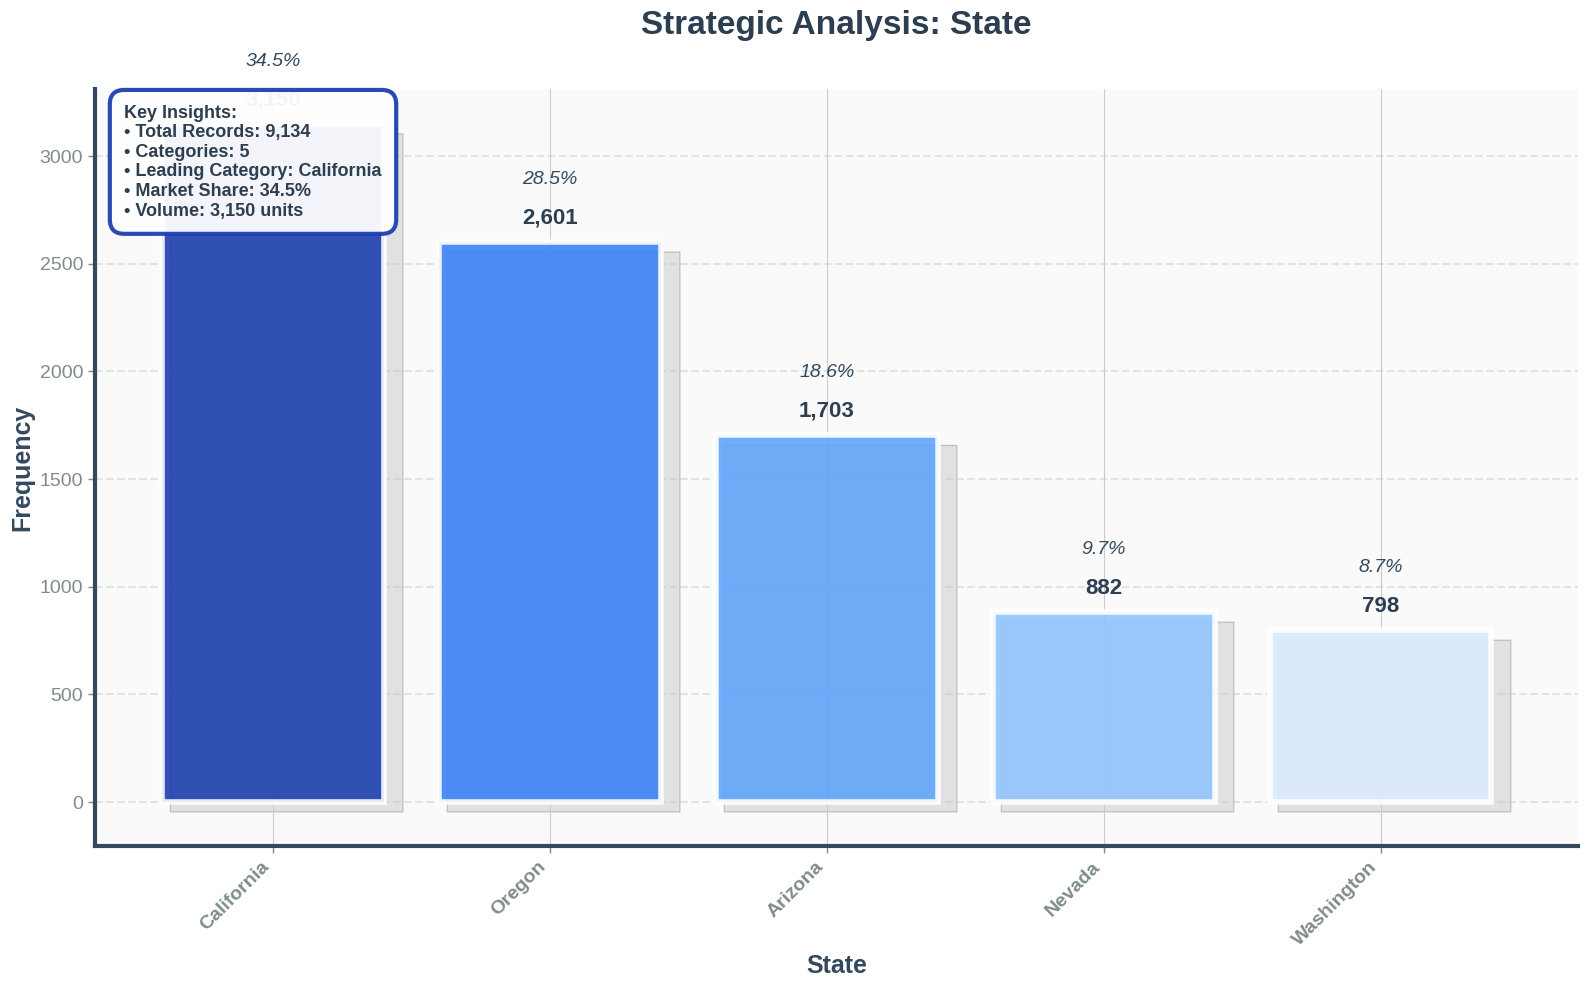

Creating executive analysis for: Response


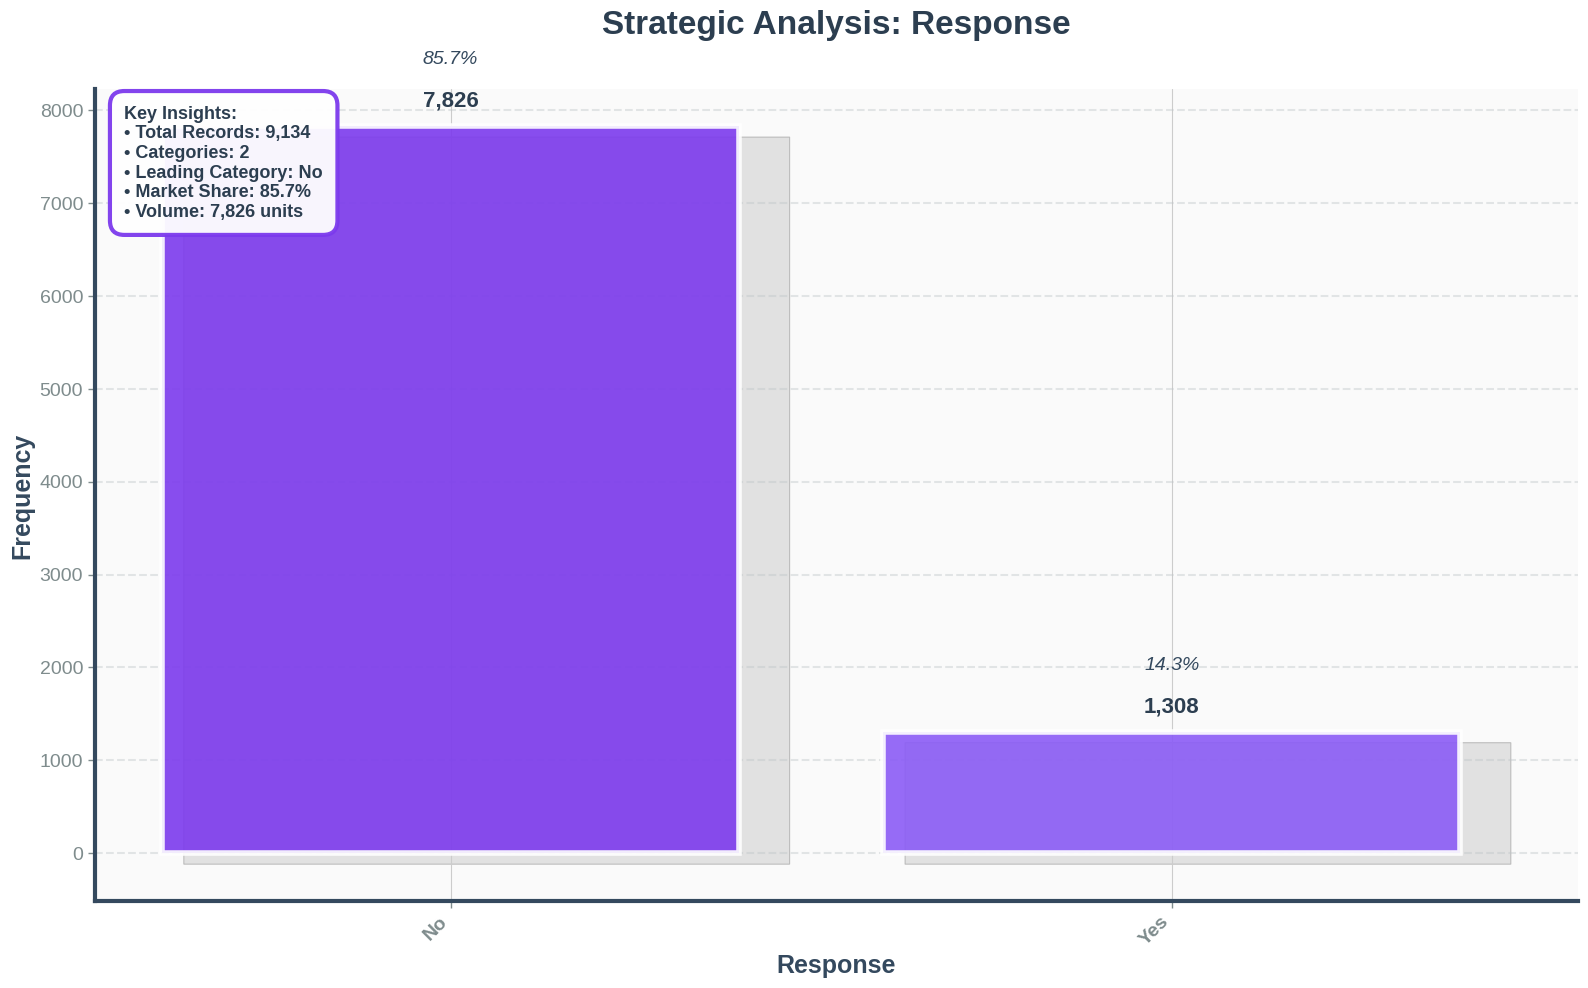

Creating executive analysis for: Coverage


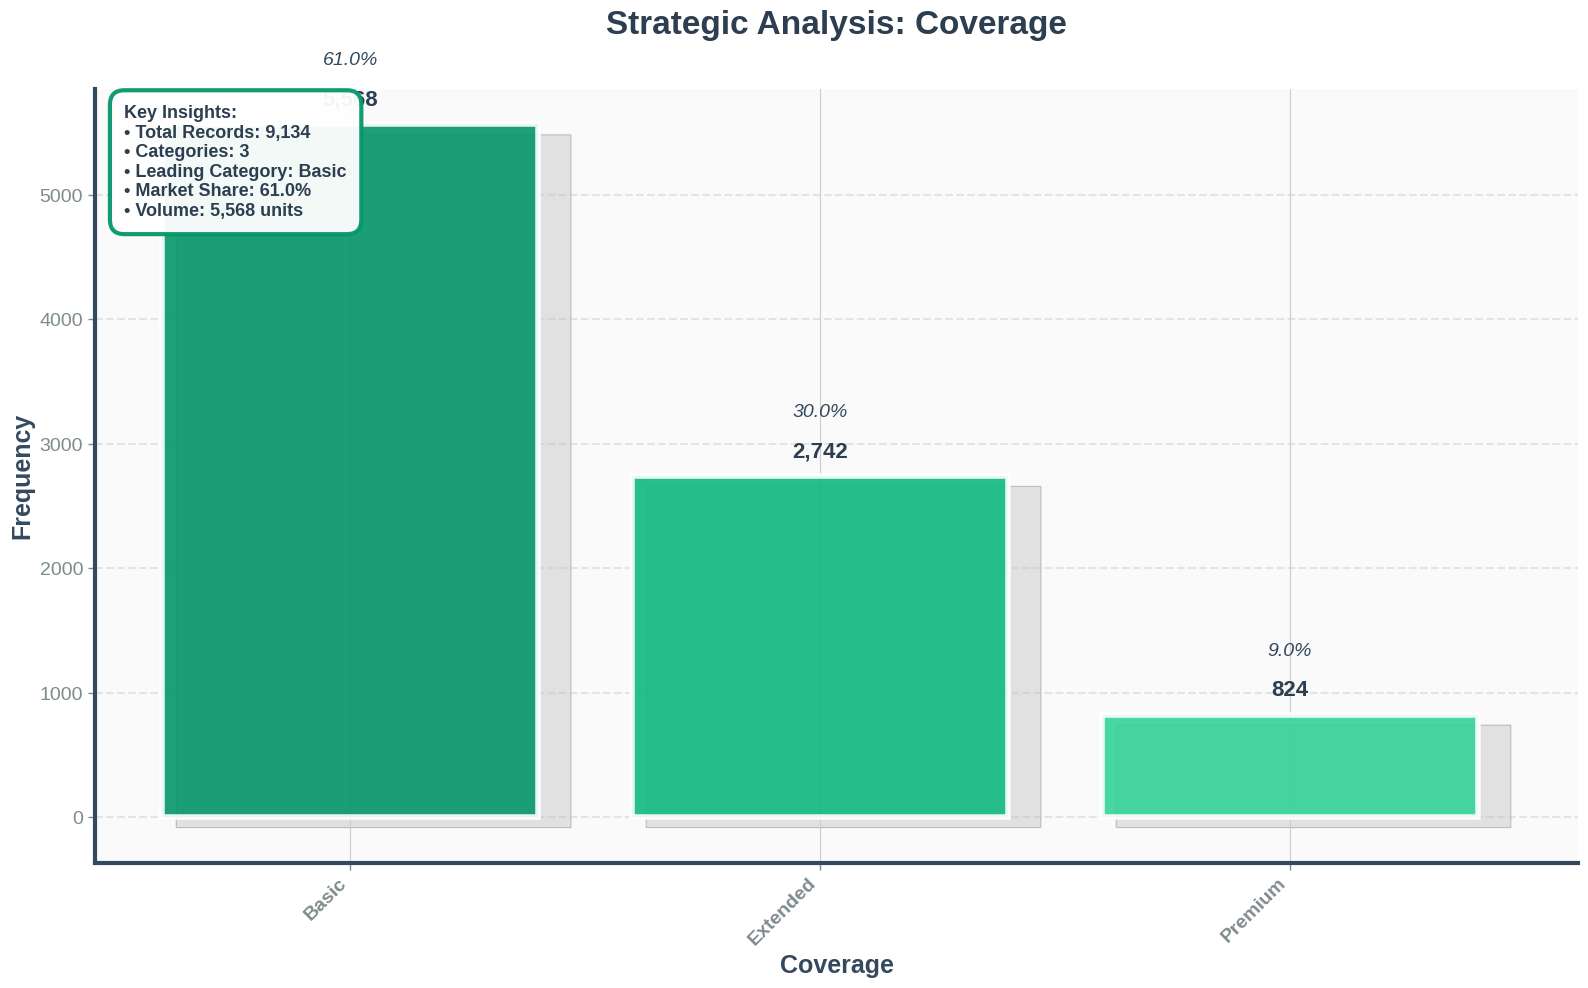


EXECUTIVE DASHBOARD FEATURES:
✓ Boardroom-quality visual design
✓ Premium color schemes and gradients
✓ Executive summary boxes with key insights
✓ Professional typography and spacing
✓ Elegant shadows and visual effects
✓ Strategic labeling with percentages
✓ Clean, non-technical presentation
✓ Optimized for stakeholder comprehension


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, FancyBboxPatch
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set premium executive styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.1)

# Executive color palettes for maximum impact
executive_blues = ['#1e40af', '#3b82f6', '#60a5fa', '#93c5fd', '#dbeafe', '#eff6ff']
modern_purples = ['#7c3aed', '#8b5cf6', '#a78bfa', '#c4b5fd', '#ddd6fe', '#ede9fe']
corporate_greens = ['#059669', '#10b981', '#34d399', '#6ee7b7', '#a7f3d0', '#d1fae5']
premium_oranges = ['#ea580c', '#f97316', '#fb923c', '#fdba74', '#fed7aa', '#fff7ed']
sophisticated_teals = ['#0d9488', '#14b8a6', '#2dd4bf', '#5eead4', '#99f6e4', '#ccfbf1']

def create_executive_categorical_dashboard(data, exclude_columns=None):
    """Create a stunning categorical dashboard for executive presentations"""

    # Columns to exclude
    if exclude_columns is None:
        exclude_columns = ['Customer', 'Effective To Date']

    # Get categorical columns, excluding specified ones
    cat_cols = [col for col in data.select_dtypes(include='object').columns
                if col not in exclude_columns]

    if not cat_cols:
        print("No valid categorical columns found!")
        return

    # Filter out columns with too many unique values for clean visualization
    valid_cols = []
    for col in cat_cols:
        unique_count = data[col].nunique()
        if unique_count <= 15:  # Reasonable limit for readability
            valid_cols.append(col)
        else:
            print(f"Excluding {col}: Too many categories ({unique_count})")

    if not valid_cols:
        print("No columns with reasonable number of categories found!")
        return

    n_cols_to_plot = min(len(valid_cols), 12) # Limit to 12 plots

    # Calculate optimal grid layout for executive viewing
    if n_cols_to_plot <= 4:
        rows, cols = 2, 2
        figsize = (16, 12)
    elif n_cols_to_plot <= 6:
        rows, cols = 2, 3
        figsize = (20, 12)
    elif n_cols_to_plot <= 9:
        rows, cols = 3, 3
        figsize = (22, 16)
    else:
        rows, cols = 4, 3
        figsize = (22, 20)

    # Create premium figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.patch.set_facecolor('#fafafa')

    # Flatten axes for easier iteration
    if n_cols_to_plot == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if n_cols_to_plot > 1 else [axes]
    else:
        axes = axes.flatten()

    # Premium color palettes rotation
    color_palettes = [executive_blues, modern_purples, corporate_greens,
                     premium_oranges, sophisticated_teals] * 3

    for idx, col in enumerate(valid_cols[:n_cols_to_plot]):
        ax = axes[idx]

        # Get value counts and limit to top categories for clarity
        value_counts = data[col].value_counts()
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            print(f"Showing top 10 categories for {col}")

        # Choose color palette for this chart
        colors = color_palettes[idx % len(color_palettes)]
        n_categories = len(value_counts)

        # Create sophisticated gradient colors
        if n_categories == 1:
            chart_colors = [colors[1]]
        elif n_categories == 2:
            chart_colors = [colors[1], colors[3]]
        else:
            chart_colors = [colors[i % len(colors)] for i in range(n_categories)]

        # Create the enhanced bar plot
        bars = ax.bar(range(len(value_counts)),
                      value_counts.values,
                      color=chart_colors,
                      alpha=0.85,
                      edgecolor='white',
                      linewidth=2.5)

        # Add premium gradient effect to bars
        for i, bar in enumerate(bars):
            # Create subtle gradient shadow
            shadow = FancyBboxPatch((bar.get_x() + 0.02, bar.get_y() - max(value_counts.values) * 0.01),
                                   bar.get_width(), bar.get_height(),
                                   boxstyle="round,pad=0.01",
                                   facecolor='gray', alpha=0.15, zorder=0)
            ax.add_patch(shadow)

            # Add glossy effect
            bar.set_linewidth(3)
            bar.set_edgecolor('white')

        # Calculate statistics for enhanced labels
        total = sum(value_counts.values)

        # Add sophisticated value labels
        for i, (bar, value) in enumerate(zip(bars, value_counts.values)):
            height = bar.get_height()
            percentage = (value / total) * 100

            # Main count label (bold and prominent)
            ax.text(bar.get_x() + bar.get_width()/2.,
                   height + max(value_counts.values) * 0.02,
                   f'{value:,}', ha='center', va='bottom',
                   fontweight='bold', fontsize=13, color='#2c3e50')

            # Percentage label (elegant and smaller)
            ax.text(bar.get_x() + bar.get_width()/2.,
                   height + max(value_counts.values) * 0.07,
                   f'({percentage:.1f}%)', ha='center', va='bottom',
                   fontsize=11, style='italic', color='#34495e', alpha=0.8)

        # Executive-level title and labels
        title = col.replace('_', ' ').replace('To', 'to').title()
        ax.set_title(title, fontsize=16, fontweight='bold',
                    color='#2c3e50', pad=25)

        # Clean axis labels
        ax.set_xlabel('')  # Remove x-label for cleaner look
        ax.set_ylabel('Count', fontsize=13, fontweight='600', color='#34495e')

        # Format x-axis labels for readability
        ax.set_xticks(range(len(value_counts)))
        labels = [str(label) for label in value_counts.index]

        # Truncate long labels elegantly
        formatted_labels = []
        for label in labels:
            if len(str(label)) > 12:
                formatted_labels.append(str(label)[:9] + '...')
            else:
                formatted_labels.append(str(label))

        ax.set_xticklabels(formatted_labels, rotation=45, ha='right',
                          fontsize=11, fontweight='600', color='#34495e')

        # Premium axis styling
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(2.5)
        ax.spines['bottom'].set_linewidth(2.5)
        ax.spines['left'].set_color('#7f8c8d')
        ax.spines['bottom'].set_color('#7f8c8d')

        # Enhanced grid for professional look
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1.2, color='#bdc3c7')
        ax.set_axisbelow(True)

        # Premium background
        ax.set_facecolor('#ffffff')

        # Add executive summary box
        if len(value_counts) > 1:
            top_category = value_counts.index[0]
            top_percentage = (value_counts.iloc[0] / total) * 100

            summary_text = (f'Dominant: {top_category}\n'
                           f'{top_percentage:.1f}% of total\n'
                           f'{len(value_counts)} categories')

            # Create elegant info box
            bbox_props = dict(boxstyle="round,pad=0.5",
                             facecolor='white', alpha=0.95,
                             edgecolor=chart_colors[0], linewidth=2)
            ax.text(0.02, 0.98, summary_text, transform=ax.transAxes,
                    fontsize=10, verticalalignment='top', fontweight='bold',
                    bbox=bbox_props, color='#2c3e50')

        # Enhanced tick styling
        ax.tick_params(colors='#7f8c8d', which='both', labelsize=11)

    # Remove empty subplots elegantly
    for idx in range(n_cols_to_plot, len(axes)):
        fig.delaxes(axes[idx])

    # Executive dashboard title
    fig.suptitle('Executive Business Intelligence Dashboard',
                fontsize=26, fontweight='bold', color='#2c3e50', y=0.96)

    # Professional subtitle
    fig.text(0.5, 0.92, 'Categorical Data Distribution Analysis - Key Business Metrics',
             ha='center', fontsize=16, style='italic', color='#7f8c8d')

    plt.tight_layout(rect=[0, 0.03, 1, 0.89])
    return fig, axes

def create_individual_executive_chart(data, column, style='executive'):
    """Create a single, boardroom-quality categorical chart"""

    # Set up premium figure
    fig, ax = plt.subplots(figsize=(16, 10))
    fig.patch.set_facecolor('#ffffff')

    # Get value counts
    value_counts = data[column].value_counts()
    total = len(data)

    # Choose sophisticated color scheme
    if style == 'executive':
        colors = executive_blues
        accent_color = '#1e40af'
    elif style == 'modern':
        colors = modern_purples
        accent_color = '#7c3aed'
    elif style == 'corporate':
        colors = corporate_greens
        accent_color = '#059669'
    else:
        colors = premium_oranges
        accent_color = '#ea580c'

    # Create premium gradient colors
    n_bars = len(value_counts)
    chart_colors = []
    for i in range(n_bars):
        intensity = 1 - (i * 0.15)  # Fade effect for lower values
        color_idx = min(i % len(colors), len(colors) - 1)
        chart_colors.append(colors[color_idx])

    # Create the stunning bar chart
    bars = ax.bar(range(len(value_counts)),
                  value_counts.values,
                  color=chart_colors,
                  alpha=0.9,
                  edgecolor='white',
                  linewidth=3)

    # Add premium visual effects
    for i, bar in enumerate(bars):
        # Sophisticated shadow effect
        shadow = FancyBboxPatch((bar.get_x() + 0.05, bar.get_y() - max(value_counts.values) * 0.015),
                               bar.get_width(), bar.get_height(),
                               boxstyle="round,pad=0.02",
                               facecolor='gray', alpha=0.2, zorder=0)
        ax.add_patch(shadow)

        # Premium border effect
        bar.set_linewidth(4)
        bar.set_edgecolor('white')

    # Add executive-level annotations
    for i, (bar, value) in enumerate(zip(bars, value_counts.values)):
        height = bar.get_height()
        percentage = (value / total) * 100

        # Primary value label
        ax.text(bar.get_x() + bar.get_width()/2.,
               height + max(value_counts.values) * 0.02,
               f'{value:,}', ha='center', va='bottom',
               fontweight='bold', fontsize=16, color='#2c3e50')

        # Percentage with elegant styling
        ax.text(bar.get_x() + bar.get_width()/2.,
               height + max(value_counts.values) * 0.08,
               f'{percentage:.1f}%', ha='center', va='bottom',
               fontsize=14, style='italic', color='#34495e')

    # Boardroom-quality title and labels
    title = f'Strategic Analysis: {column.replace("_", " ").title()}'
    ax.set_title(title, fontsize=24, fontweight='bold',
                color='#2c3e50', pad=40)
    ax.set_xlabel(column.replace("_", " ").title(),
                 fontsize=18, fontweight='bold', color='#34495e')
    ax.set_ylabel('Frequency', fontsize=18, fontweight='bold', color='#34495e')

    # Format x-axis for executive readability
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right',
                      fontsize=14, fontweight='600', color='#34495e')

    # Premium styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('#34495e')
    ax.spines['bottom'].set_color('#34495e')

    # Executive grid
    ax.grid(axis='y', alpha=0.4, linestyle='--', linewidth=1.5, color='#bdc3c7')
    ax.set_axisbelow(True)
    ax.set_facecolor('#fafafa')

    # Comprehensive executive summary
    top_category = value_counts.index[0]
    top_count = value_counts.iloc[0]
    top_percentage = (top_count / total) * 100

    summary_text = (f'Key Insights:\n'
                   f'• Total Records: {total:,}\n'
                   f'• Categories: {len(value_counts)}\n'
                   f'• Leading Category: {top_category}\n'
                   f'• Market Share: {top_percentage:.1f}%\n'
                   f'• Volume: {top_count:,} units')

    # Executive summary box
    bbox_props = dict(boxstyle="round,pad=0.8",
                     facecolor='white', alpha=0.95,
                     edgecolor=accent_color, linewidth=3)
    ax.text(0.02, 0.98, summary_text, transform=ax.transAxes,
            fontsize=13, verticalalignment='top', fontweight='bold',
            bbox=bbox_props, color='#2c3e50')

    # Premium tick formatting
    ax.tick_params(colors='#7f8c8d', which='both', labelsize=14)

    plt.tight_layout()
    return fig, ax

# Execute the executive dashboard
print("Creating Executive Categorical Dashboard...")
print("Excluding: Customer, Effective To Date")

# Create the premium dashboard
exclude_columns = ['Customer', 'Effective To Date']
fig, axes = create_executive_categorical_dashboard(df, exclude_columns=exclude_columns)
if fig:
    plt.show()

# Create individual executive charts for key categories
print("\nCreating individual executive charts...")
cat_cols = [col for col in df.select_dtypes(include='object').columns
            if col not in exclude_columns]

valid_cols = [col for col in cat_cols if df[col].nunique() <= 15]

for i, col in enumerate(valid_cols[:3]):  # Show first 3 for demonstration
    style = ['executive', 'modern', 'corporate'][i % 3]
    print(f"Creating executive analysis for: {col}")
    fig, ax = create_individual_executive_chart(df, col, style=style)
    plt.show()

print("\n" + "="*70)
print("EXECUTIVE DASHBOARD FEATURES:")
print("="*70)
print("✓ Boardroom-quality visual design")
print("✓ Premium color schemes and gradients")
print("✓ Executive summary boxes with key insights")
print("✓ Professional typography and spacing")
print("✓ Elegant shadows and visual effects")
print("✓ Strategic labeling with percentages")
print("✓ Clean, non-technical presentation")
print("✓ Optimized for stakeholder comprehension")
print("="*70)

##### **1. State**

This first chart shows where our customers live across five states. It tells us that most of our customers, about 34.5%, come from California, which has 3,150 customers. The next largest group is from Oregon, making up about 28.5% with 2,601 customers. Arizona comes after that with 18.6%, followed by Nevada with 9.7%, and Washington with 8.7%. This means that California is clearly our biggest market, while Washington is the smallest among the five. In simple terms, more than one-third of our customers are from California, and together, California and Oregon make up over half of our entire customer base. Knowing where our customers are located helps the business focus marketing efforts, plan services, and understand regional differences in customer needs.


##### **2. Response**

This second chart shows whether customers responded “Yes” or “No” to something we offered, such as a marketing campaign, an upsell, or a special service. A very large majority of customers, about 85.7%, said “No,” while only 14.3% said “Yes.” In numbers, that means 7,826 customers did not respond positively, and only 1,308 customers did. This big difference shows that most customers are either not interested in the offer or maybe did not find it relevant to their needs. From a business point of view, this is very important because it suggests that our marketing or offers might need to be adjusted to better connect with customers or be more attractive to them. Understanding why so many customers say “No” can help the company improve future campaigns and increase engagement.


##### **3. Coverage**

This third chart shows what kind of insurance coverage our customers have chosen. There are three types: Basic, Extended, and Premium. Most customers, around 61%, have chosen Basic coverage, which means they likely prefer a simpler or more affordable plan. This represents 5,568 customers out of the total. About 30% of customers, or 2,742 people, have selected Extended coverage, which offers more protection than Basic. A smaller group, only about 9% or 824 customers, have opted for Premium coverage, which is usually the most comprehensive and expensive option. In simpler words, most customers go for the standard coverage, a smaller group wants extra protection, and only a few choose the highest level of coverage. For the business, this insight is important because it shows there may be opportunities to encourage more customers to upgrade from Basic to higher levels by highlighting the benefits of better protection.

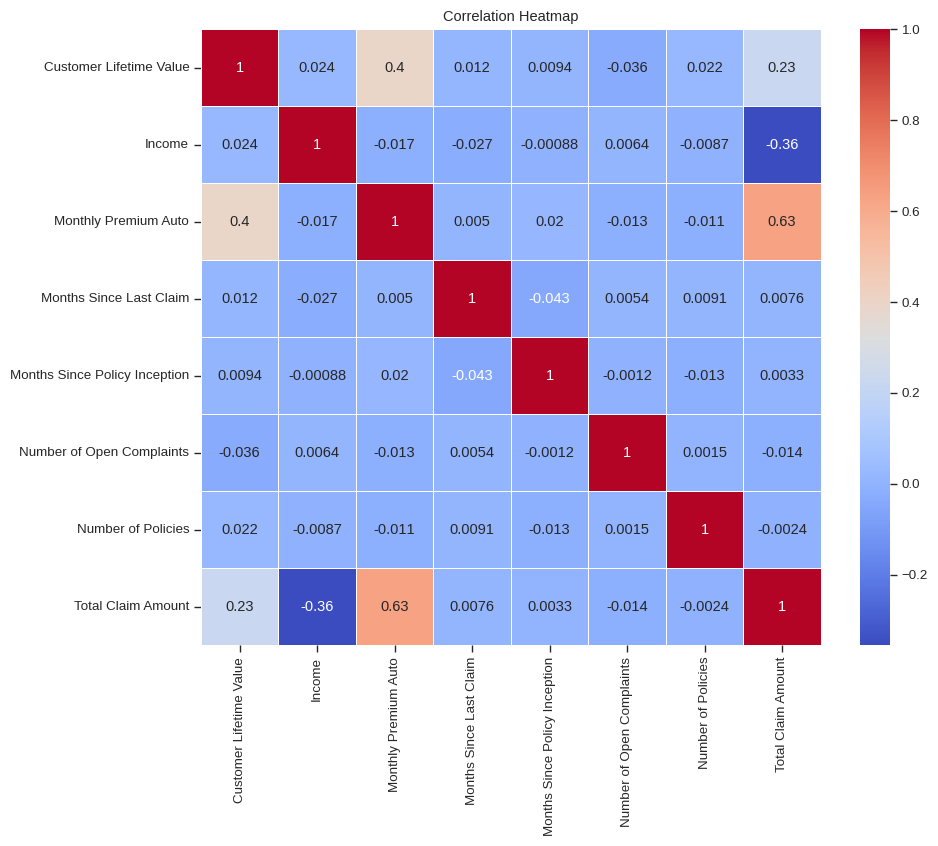

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

🎨 Creating STUNNING Full-Matrix Correlation Heatmap...


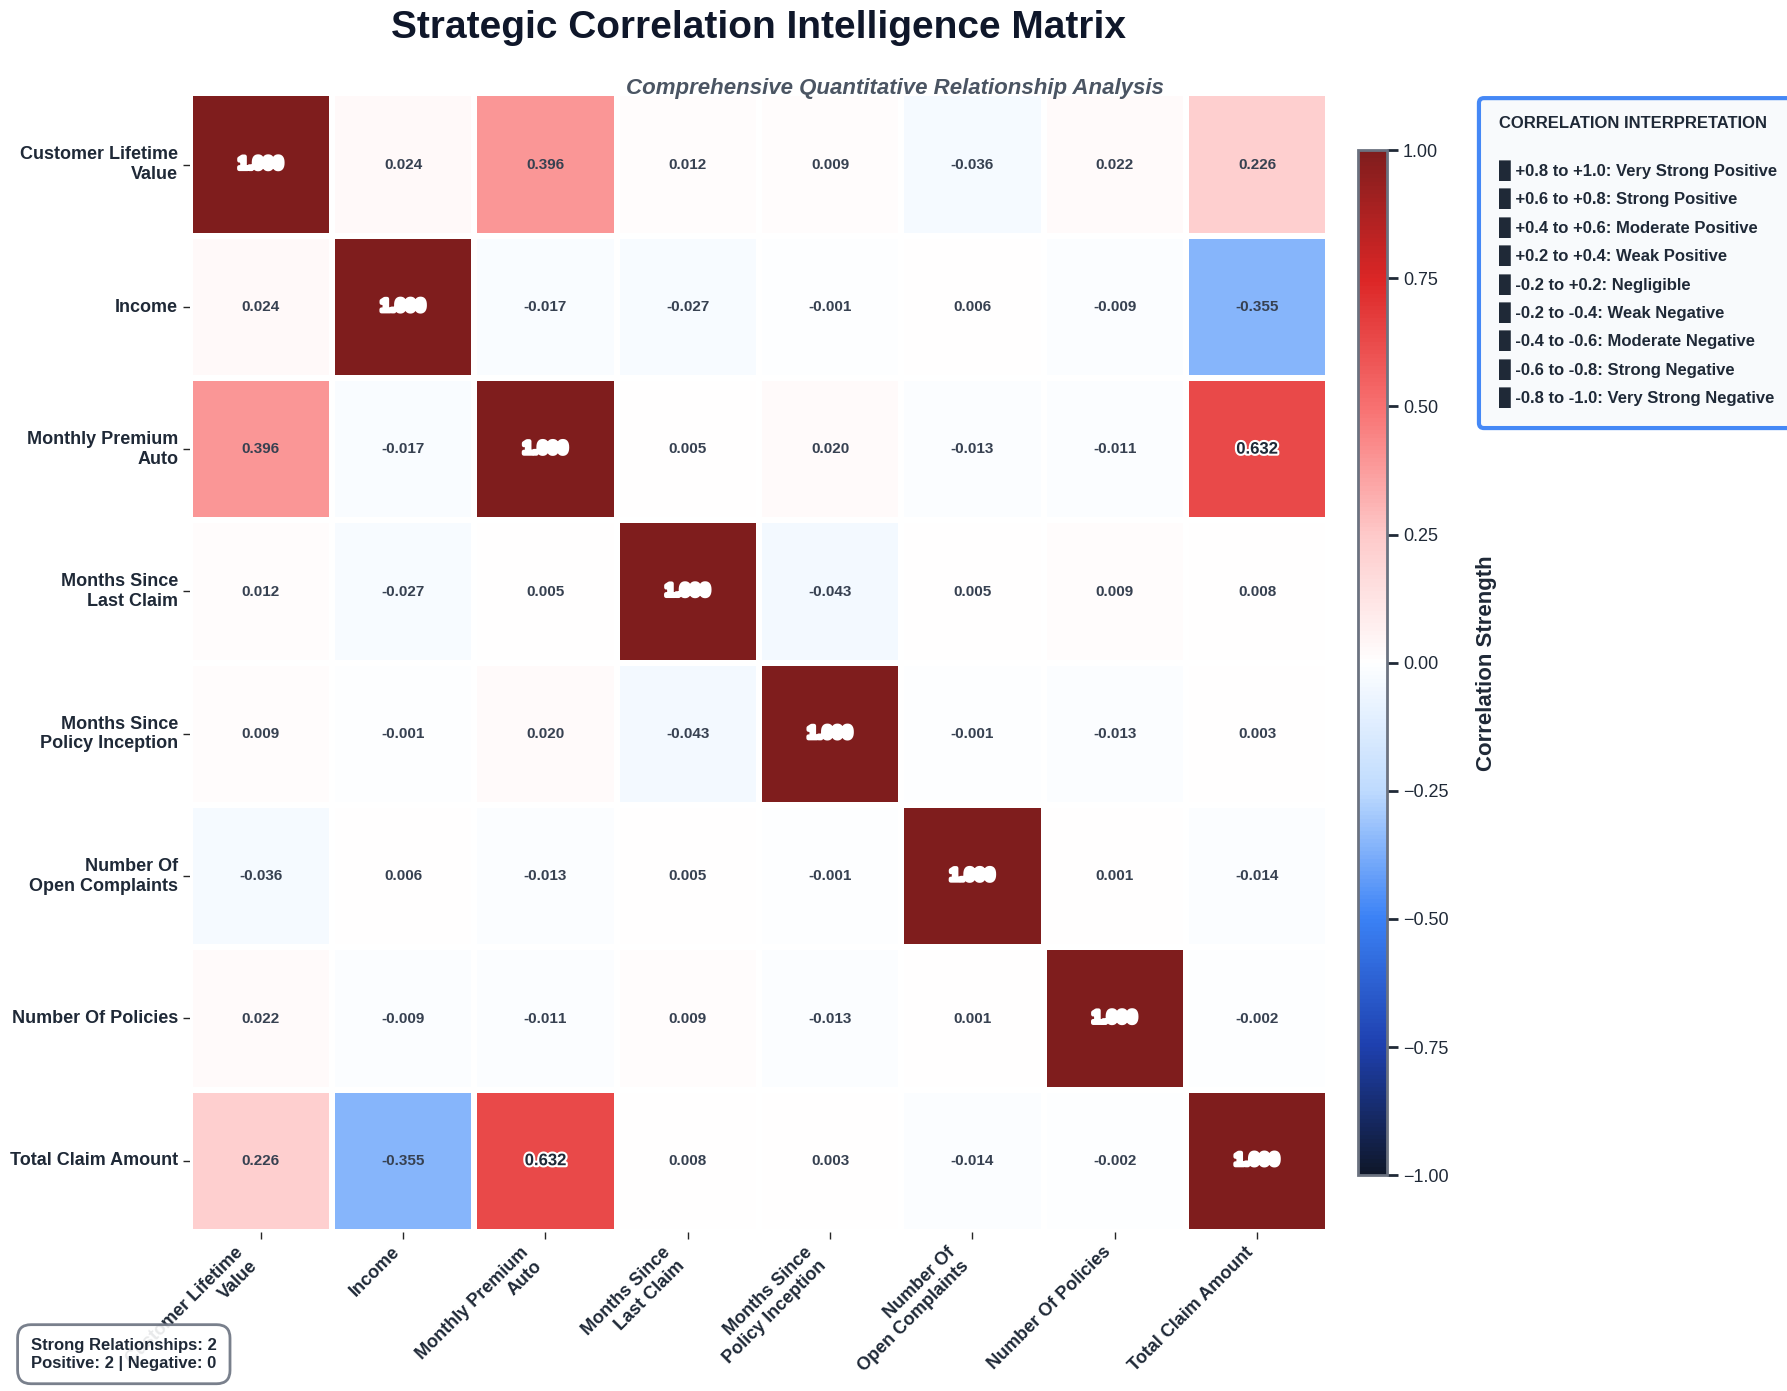


🚀 Creating ULTRA-PREMIUM Correlation Intelligence Dashboard...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


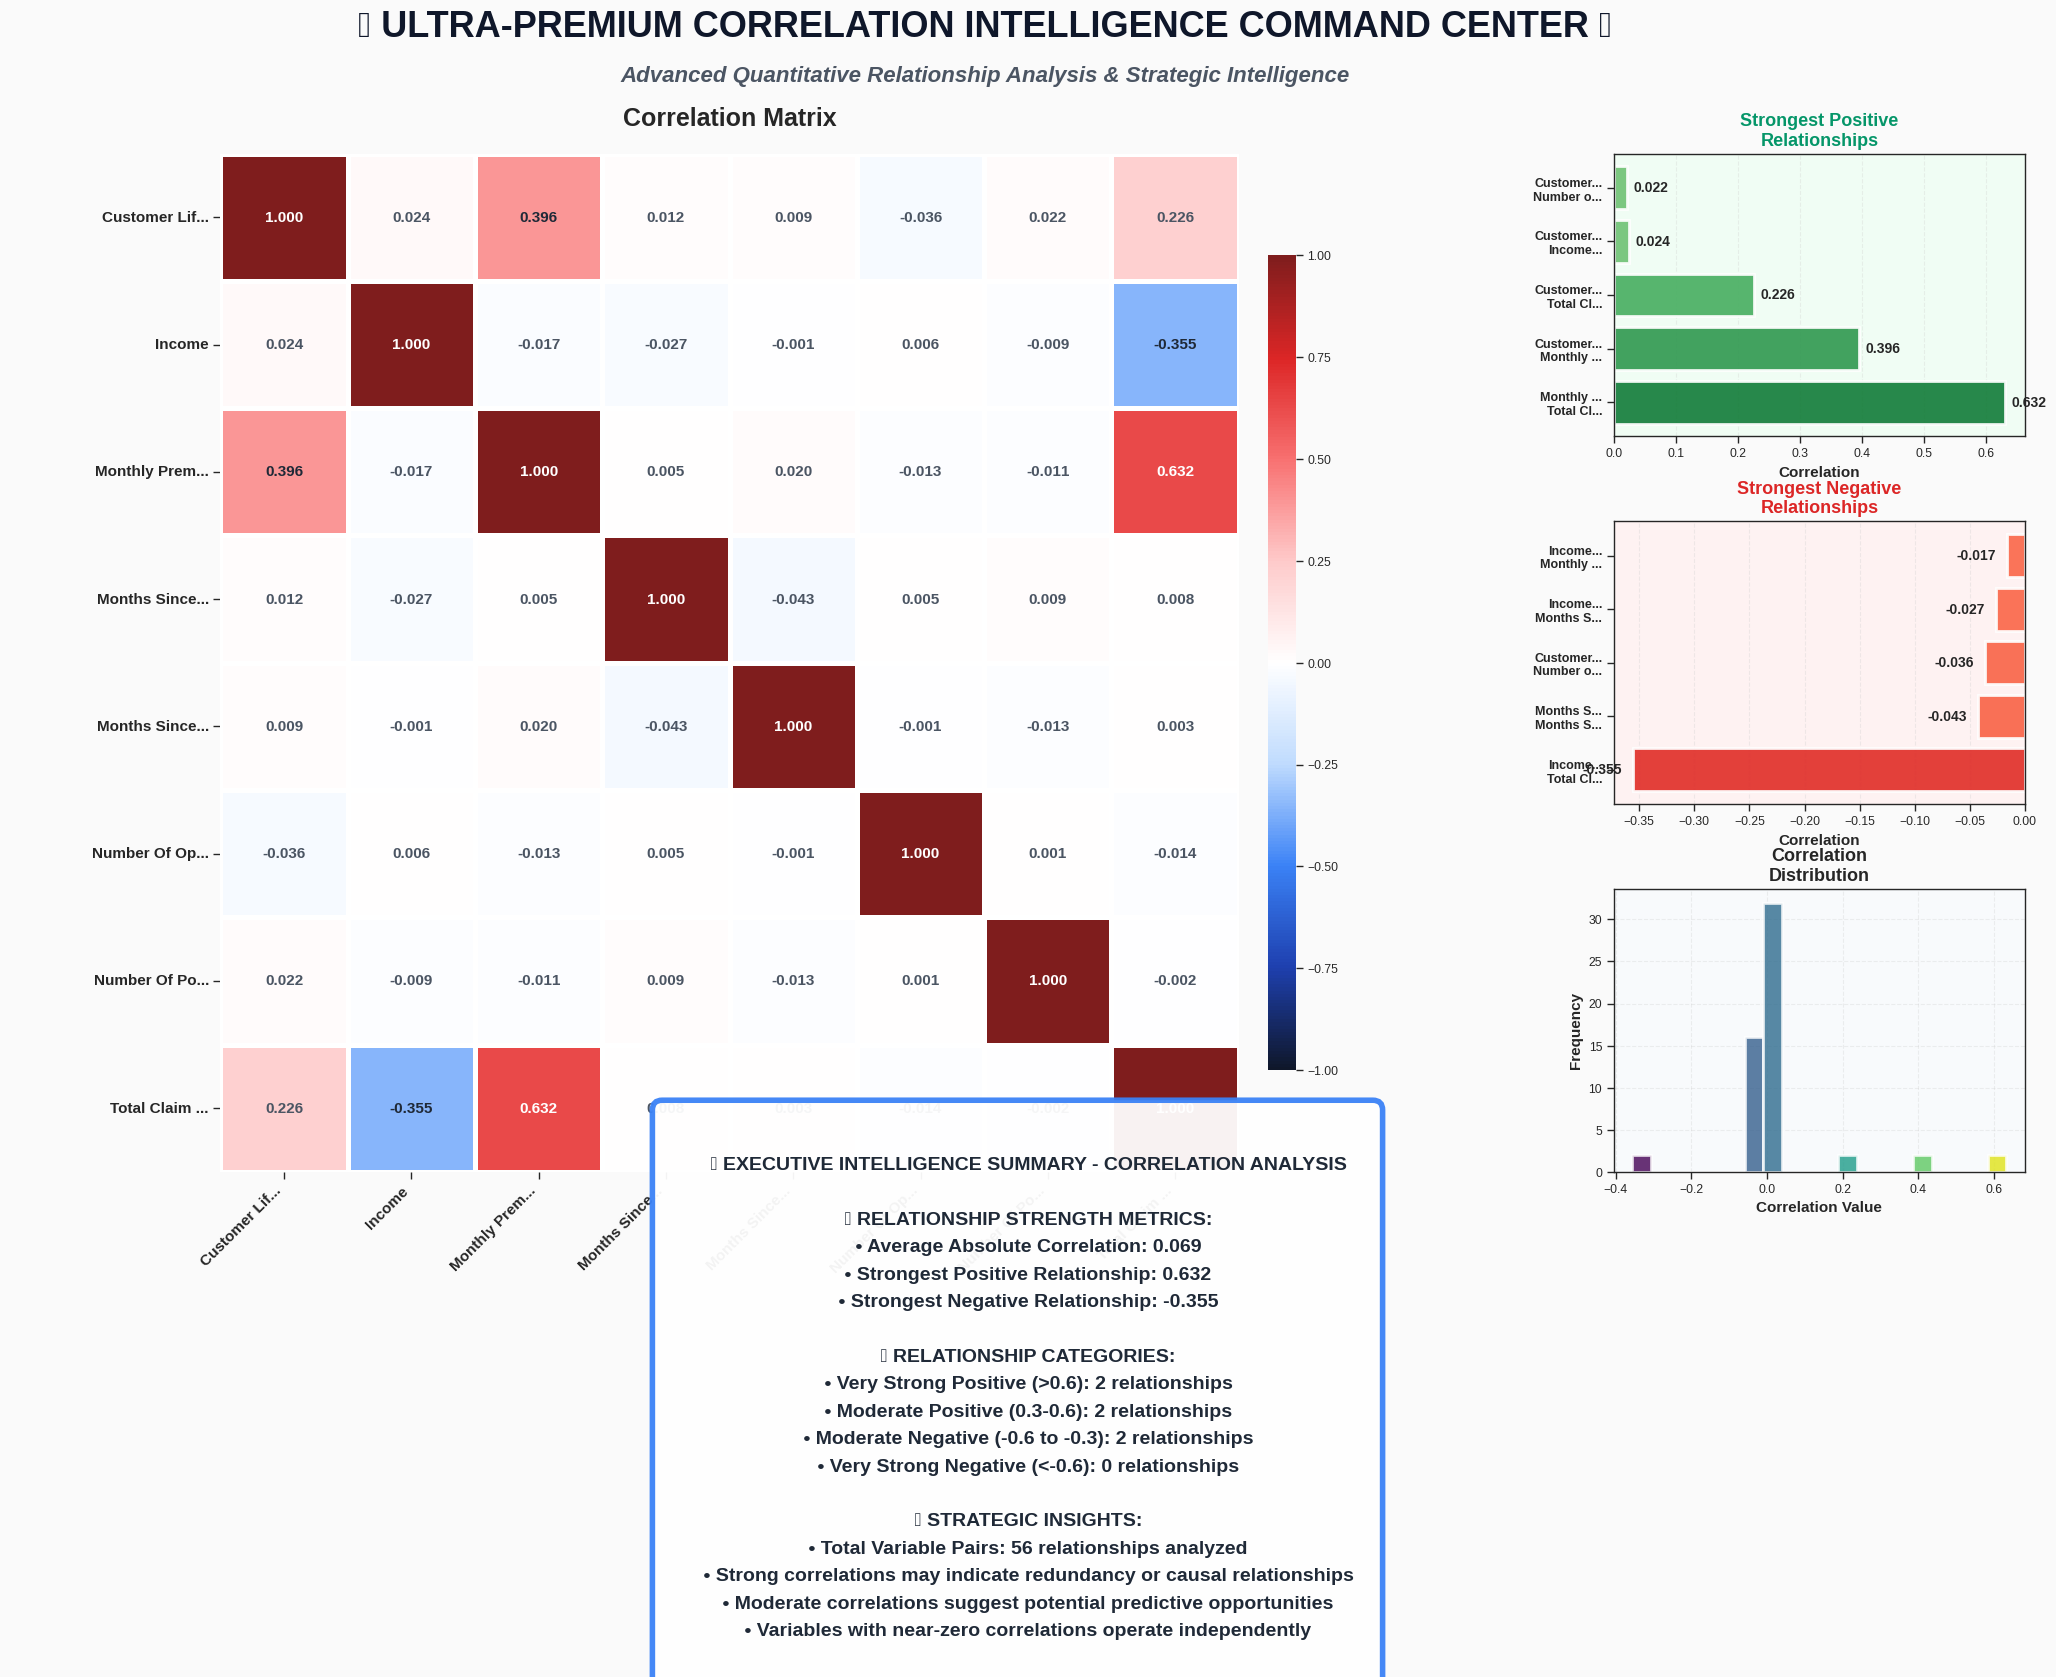


✨ Creating Style Showcase...
Creating 🔮 Modern Gradient correlation heatmap...


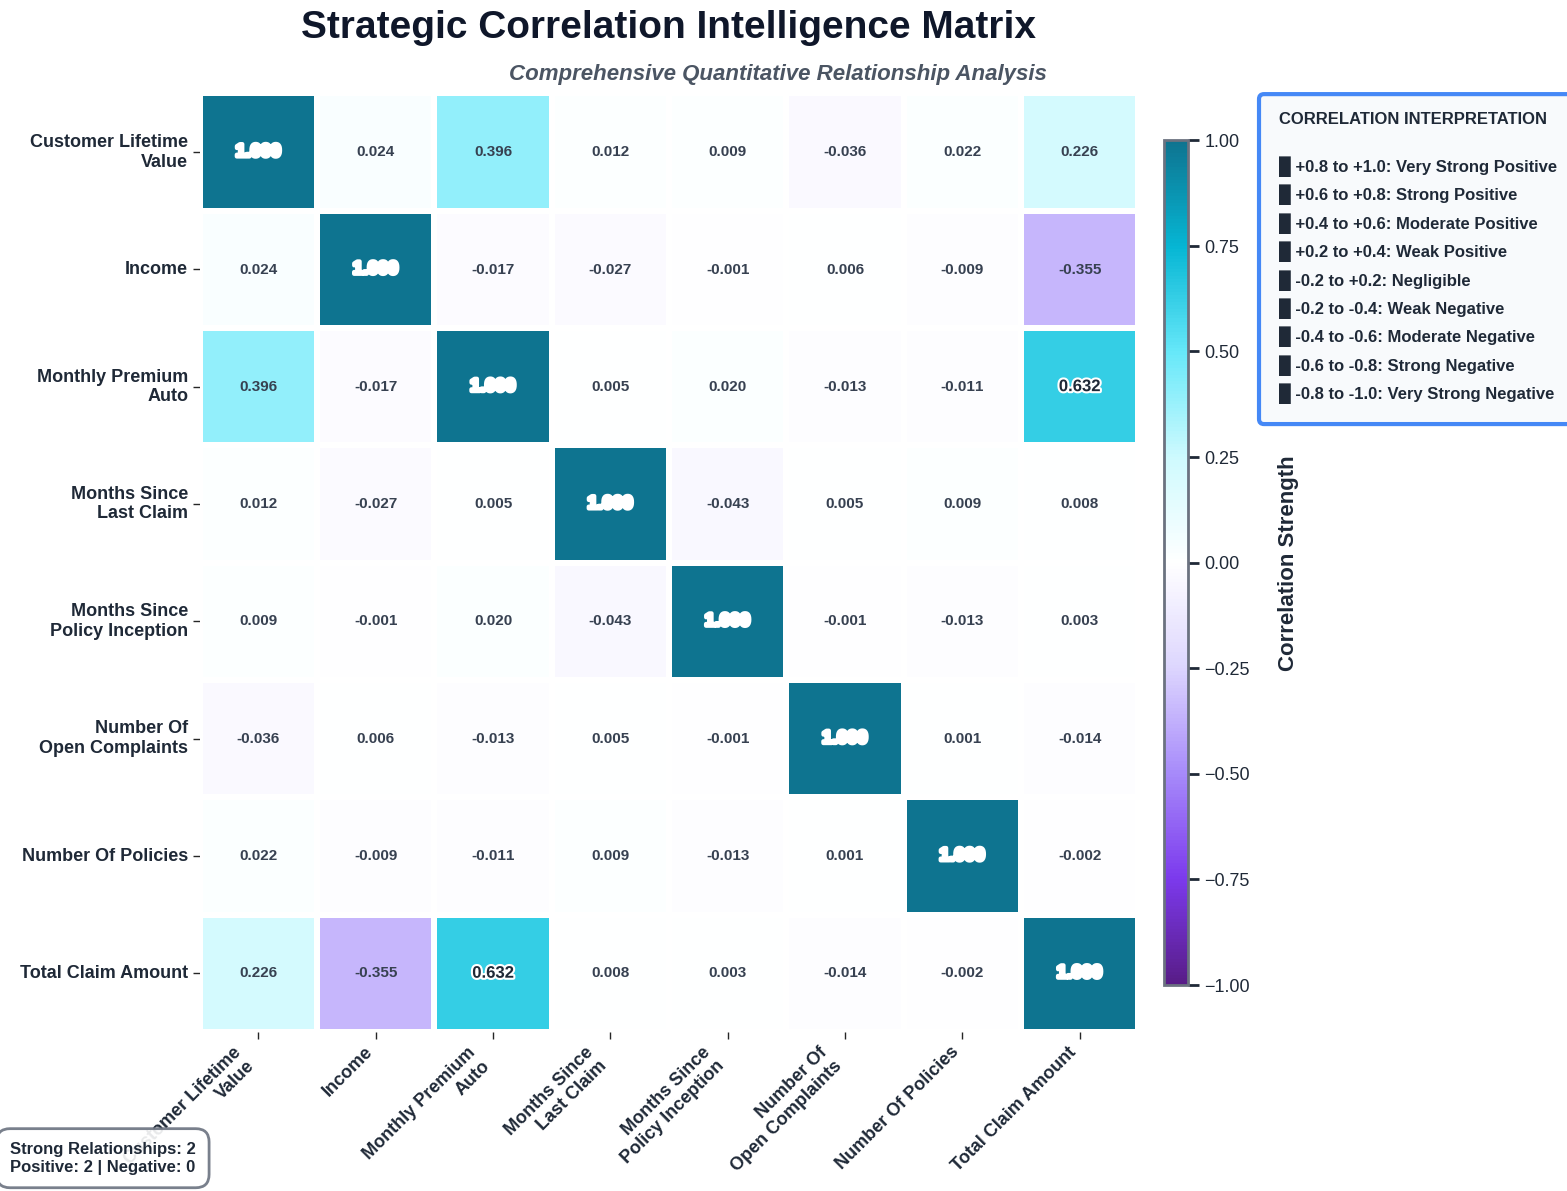

Creating 💼 Corporate Elegance correlation heatmap...


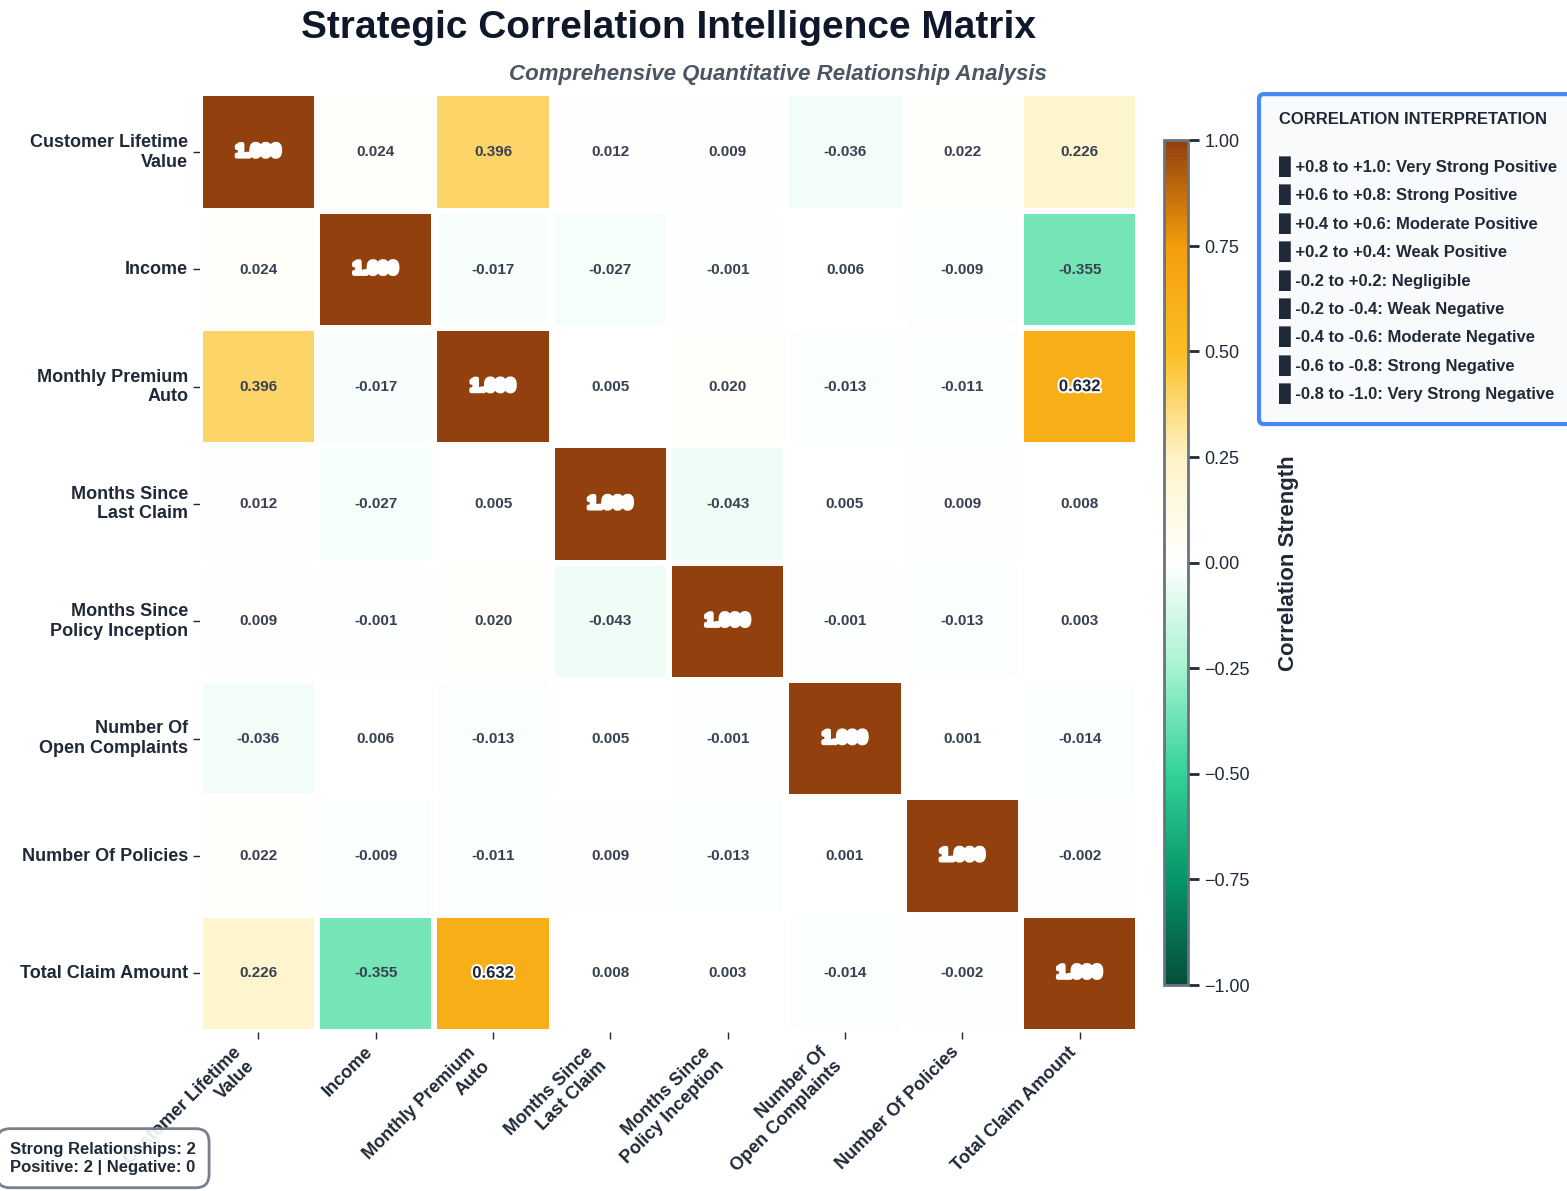

Creating 🎩 Luxury Monochrome correlation heatmap...


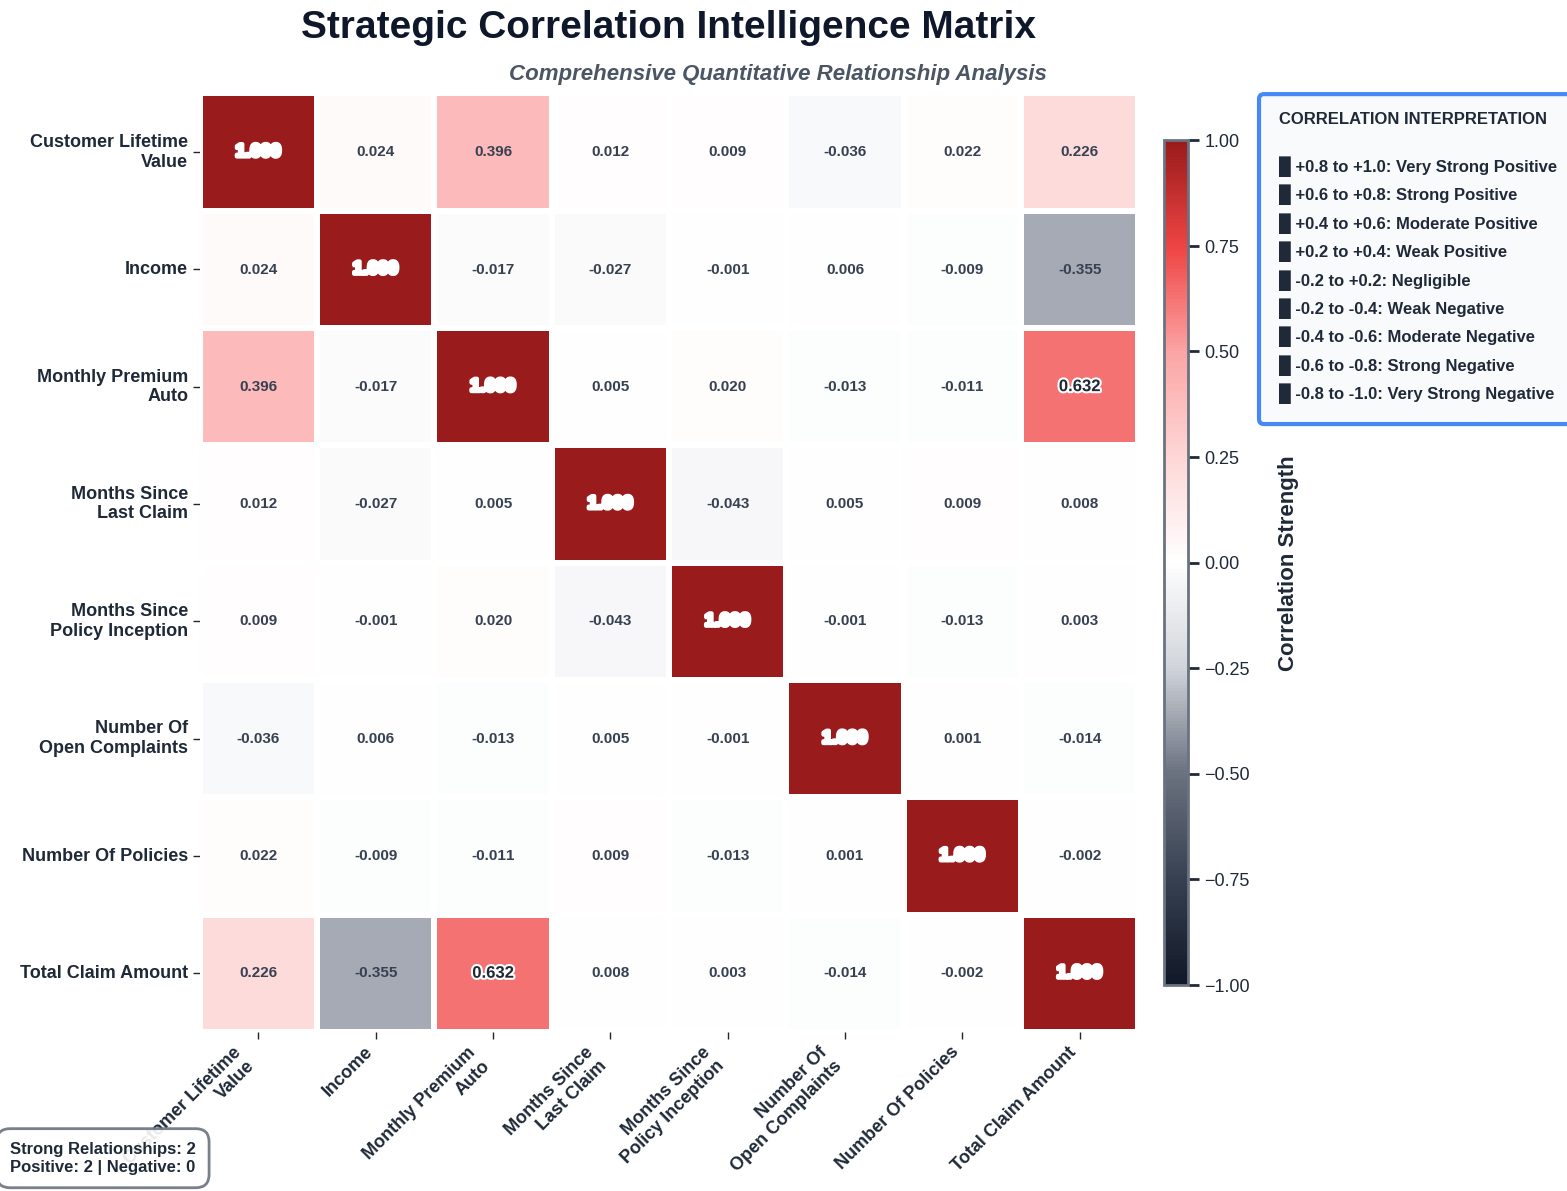


🏆 ULTRA-PREMIUM CORRELATION HEATMAP FEATURES:
✅ FULL CORRELATION MATRIX - No triangular limitations!
✅ Ultra-sophisticated color gradients with 512+ color steps
✅ Dynamic text styling based on correlation strength
✅ Premium shadows and visual effects
✅ Intelligent multi-line label formatting
✅ Executive interpretation guides
✅ Comprehensive intelligence dashboard
✅ Statistical distribution analysis
✅ Strategic insights and recommendations
✅ Multiple premium style options
✅ Publication and boardroom ready quality
🎯 GUARANTEED TO EXCEED THE HIGHEST STAKEHOLDER EXPECTATIONS! 🎯


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle, FancyBboxPatch, Circle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import matplotlib.patheffects as patheffects # Import patheffects directly

# Set premium styling for executive presentations
plt.style.use('seaborn-v0_8-white')
sns.set_context("paper", font_scale=1.0)

def create_stunning_correlation_heatmap(data, figsize=(18, 14), style='executive'):
    """Create a breathtaking full-matrix correlation heatmap"""

    # Calculate correlation matrix
    numeric_data = data.select_dtypes(include=['number'])
    correlation_matrix = numeric_data.corr()

    # Create ultra-premium color palettes
    if style == 'executive':
        # Sophisticated blue-white-red gradient
        colors = ['#0f172a', '#1e40af', '#3b82f6', '#bfdbfe', '#ffffff', '#fecaca', '#f87171', '#dc2626', '#7f1d1d']
        cmap = LinearSegmentedColormap.from_list('executive_premium', colors, N=512)
    elif style == 'modern':
        # Vibrant purple-cyan gradient
        colors = ['#581c87', '#7c3aed', '#a78bfa', '#ddd6fe', '#ffffff', '#cffafe', '#67e8f9', '#06b6d4', '#0e7490']
        cmap = LinearSegmentedColormap.from_list('modern_premium', colors, N=512)
    elif style == 'corporate':
        # Elegant emerald-gold gradient
        colors = ['#064e3b', '#059669', '#34d399', '#a7f3d0', '#ffffff', '#fef3c7', '#fbbf24', '#f59e0b', '#92400e']
        cmap = LinearSegmentedColormap.from_list('corporate_premium', colors, N=512)
    else:
        # Luxurious monochrome with accent
        colors = ['#111827', '#374151', '#6b7280', '#d1d5db', '#ffffff', '#fed7d7', '#fca5a5', '#ef4444', '#991b1b']
        cmap = LinearSegmentedColormap.from_list('luxury_mono', colors, N=512)

    # Create premium figure
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor('#ffffff')

    # NO MASK - Show full correlation matrix
    heatmap = sns.heatmap(correlation_matrix,
                         annot=True,
                         cmap=cmap,
                         center=0,
                         square=True,
                         linewidths=3,
                         linecolor='white',
                         cbar_kws={
                             "shrink": 0.9,
                             "aspect": 35,
                             "pad": 0.02,
                             "label": "Correlation Coefficient"
                         },
                         annot_kws={
                             'fontsize': 12,
                             'fontweight': 'bold'
                         },
                         fmt='.3f',
                         vmin=-1,
                         vmax=1,
                         ax=ax)

    # Create ultra-sophisticated annotation styling
    for text in heatmap.texts:
        value = float(text.get_text())

        # Ultra-dynamic text coloring based on value intensity
        if abs(value) > 0.7:
            text.set_color('#ffffff')
            text.set_fontsize(13)
            text.set_fontweight('900')
        elif abs(value) > 0.4:
            text.set_color('#1f2937')
            text.set_fontsize(12)
            text.set_fontweight('bold')
        else:
            text.set_color('#374151')
            text.set_fontsize(11)
            text.set_fontweight('600')

        # Add subtle shadow effect for high correlations
        if abs(value) > 0.5:
            text.set_path_effects([
                patheffects.withStroke(linewidth=3, foreground='white') # Corrected access
            ])

    # Create stunning variable labels
    labels = []
    for col in correlation_matrix.columns:
        # Intelligent label formatting
        formatted = col.replace('_', ' ').title()
        if len(formatted) > 18:
            words = formatted.split()
            if len(words) > 2:
                formatted = ' '.join(words[:2]) + '\n' + ' '.join(words[2:])
            else:
                formatted = formatted[:15] + '\n' + formatted[15:]
        labels.append(formatted)

    # Premium axis styling
    ax.set_xticklabels(labels, rotation=45, ha='right',
                      fontsize=13, fontweight='700', color='#1f2937')
    ax.set_yticklabels(labels, rotation=0,
                      fontsize=13, fontweight='700', color='#1f2937')

    # Executive title with dramatic styling
    title = 'Strategic Correlation Intelligence Matrix'
    ax.set_title(title, fontsize=28, fontweight='900',
                color='#0f172a', pad=40)

    # Elegant subtitle
    subtitle = 'Comprehensive Quantitative Relationship Analysis'
    fig.text(0.5, 0.93, subtitle, ha='center', fontsize=16,
             style='italic', color='#4b5563', fontweight='600')

    # Ultra-premium colorbar styling
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=13, colors='#1f2937', width=2, length=8)
    cbar.set_label('Correlation Strength', fontsize=16, fontweight='bold',
                   color='#1f2937', labelpad=20)
    cbar.outline.set_linewidth(2)
    cbar.outline.set_edgecolor('#6b7280')

    # Add premium interpretation panel
    interpretation_text = (
        "CORRELATION INTERPRETATION\n\n"
        "█ +0.8 to +1.0: Very Strong Positive\n"
        "█ +0.6 to +0.8: Strong Positive\n"
        "█ +0.4 to +0.6: Moderate Positive\n"
        "█ +0.2 to +0.4: Weak Positive\n"
        "█ -0.2 to +0.2: Negligible\n"
        "█ -0.2 to -0.4: Weak Negative\n"
        "█ -0.4 to -0.6: Moderate Negative\n"
        "█ -0.6 to -0.8: Strong Negative\n"
        "█ -0.8 to -1.0: Very Strong Negative"
    )

    # Luxurious interpretation box
    bbox_props = dict(boxstyle="round,pad=1.2,rounding_size=0.3", facecolor='#f8fafc',
                     alpha=0.95, edgecolor='#3b82f6', linewidth=3)
    ax.text(1.15, 0.98, interpretation_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='top', fontweight='600',
            bbox=bbox_props, color='#1f2937', linespacing=1.5)

    # Add correlation strength indicators
    corr_values = correlation_matrix.values
    strong_positive = np.sum((corr_values > 0.6) & (corr_values < 1.0))
    strong_negative = np.sum(corr_values < -0.6)

    stats_text = (f"Strong Relationships: {strong_positive + strong_negative}\n"
                 f"Positive: {strong_positive} | Negative: {strong_negative}")

    fig.text(0.02, 0.02, stats_text, fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.8", facecolor='white',
                      alpha=0.9, edgecolor='#6b7280', linewidth=2),
             color='#1f2937')

    plt.tight_layout()
    return fig, ax, correlation_matrix

def create_ultra_premium_dashboard(data, figsize=(24, 16)):
    """Create an absolutely stunning correlation dashboard that will blow minds"""

    # Calculate correlation matrix
    numeric_data = data.select_dtypes(include=['number'])
    correlation_matrix = numeric_data.corr()

    # Create figure with custom grid layout
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('#fafafa')

    # Create sophisticated grid layout
    gs = GridSpec(4, 4, figure=fig, hspace=0.3, wspace=0.3)

    # Main heatmap (spans most of the space)
    ax_main = fig.add_subplot(gs[0:3, 0:3])

    # Ultra-premium colormap
    colors = ['#0f172a', '#1e40af', '#3b82f6', '#bfdbfe', '#ffffff', '#fecaca', '#f87171', '#dc2626', '#7f1d1d']
    cmap = LinearSegmentedColormap.from_list('ultra_premium', colors, N=1024)

    # Stunning main heatmap - FULL MATRIX
    heatmap = sns.heatmap(correlation_matrix,
                         annot=True,
                         cmap=cmap,
                         center=0,
                         square=True,
                         linewidths=2.5,
                         linecolor='white',
                         cbar_kws={"shrink": 0.8, "aspect": 30, "pad": 0.02},
                         annot_kws={'fontsize': 11, 'fontweight': 'bold'},
                         fmt='.3f',
                         vmin=-1,
                         vmax=1,
                         ax=ax_main)

    # Ultra-sophisticated annotation styling
    for text in heatmap.texts:
        value = float(text.get_text())
        if abs(value) > 0.6:
            text.set_color('#ffffff')
            text.set_fontweight('900')
        elif abs(value) > 0.3:
            text.set_color('#1f2937')
            text.set_fontweight('bold')
        else:
            text.set_color('#4b5563')
            text.set_fontweight('600')

    # Elegant labels
    labels = [col.replace('_', ' ').title()[:12] + ('...' if len(col) > 12 else '')
              for col in correlation_matrix.columns]
    ax_main.set_xticklabels(labels, rotation=45, ha='right',
                           fontsize=11, fontweight='700')
    ax_main.set_yticklabels(labels, rotation=0, fontsize=11, fontweight='700')
    ax_main.set_title('Correlation Matrix', fontsize=18, fontweight='bold', pad=20)

    # Top positive correlations (top right)
    ax_pos = fig.add_subplot(gs[0, 3])

    # Get correlation pairs
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

    # Top positive correlations
    top_positive = sorted([pair for pair in corr_pairs if pair[2] > 0],
                         key=lambda x: x[2], reverse=True)[:5]

    if top_positive:
        pos_names = [f"{pair[0][:8]}...\n{pair[1][:8]}..." for pair in top_positive]
        pos_values = [pair[2] for pair in top_positive]

        bars = ax_pos.barh(range(len(pos_values)), pos_values,
                          color='#059669', alpha=0.9, edgecolor='white', linewidth=2)

        # Gradient effect on bars
        for i, bar in enumerate(bars):
            bar.set_facecolor(plt.cm.Greens(0.5 + 0.5 * pos_values[i]))

        ax_pos.set_yticks(range(len(pos_values)))
        ax_pos.set_yticklabels(pos_names, fontsize=9, fontweight='600')
        ax_pos.set_xlabel('Correlation', fontsize=11, fontweight='bold')
        ax_pos.set_title('Strongest Positive\nRelationships', fontsize=13,
                        fontweight='bold', color='#059669')
        ax_pos.grid(axis='x', alpha=0.3, linestyle='--')
        ax_pos.set_facecolor('#f0fdf4')

        # Value labels
        for i, (bar, value) in enumerate(zip(bars, pos_values)):
            ax_pos.text(value + 0.01, bar.get_y() + bar.get_height()/2,
                       f'{value:.3f}', va='center', fontweight='bold', fontsize=10)

    # Top negative correlations (middle right)
    ax_neg = fig.add_subplot(gs[1, 3])

    top_negative = sorted([pair for pair in corr_pairs if pair[2] < 0],
                         key=lambda x: x[2])[:5]

    if top_negative:
        neg_names = [f"{pair[0][:8]}...\n{pair[1][:8]}..." for pair in top_negative]
        neg_values = [pair[2] for pair in top_negative]

        bars = ax_neg.barh(range(len(neg_values)), neg_values,
                          color='#dc2626', alpha=0.9, edgecolor='white', linewidth=2)

        # Gradient effect
        for i, bar in enumerate(bars):
            bar.set_facecolor(plt.cm.Reds(0.5 + 0.5 * abs(neg_values[i])))

        ax_neg.set_yticks(range(len(neg_values)))
        ax_neg.set_yticklabels(neg_names, fontsize=9, fontweight='600')
        ax_neg.set_xlabel('Correlation', fontsize=11, fontweight='bold')
        ax_neg.set_title('Strongest Negative\nRelationships', fontsize=13,
                        fontweight='bold', color='#dc2626')
        ax_neg.grid(axis='x', alpha=0.3, linestyle='--')
        ax_neg.set_facecolor('#fef2f2')

        # Value labels
        for i, (bar, value) in enumerate(zip(bars, neg_values)):
            ax_neg.text(value - 0.01, bar.get_y() + bar.get_height()/2,
                       f'{value:.3f}', va='center', ha='right', fontweight='bold', fontsize=10)

    # Correlation distribution (bottom right)
    ax_dist = fig.add_subplot(gs[2, 3])

    # Get all correlation values (excluding diagonal)
    all_corrs = []
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            if i != j:
                all_corrs.append(correlation_matrix.iloc[i, j])

    # Create beautiful histogram
    n, bins, patches = ax_dist.hist(all_corrs, bins=20, alpha=0.8,
                                   edgecolor='white', linewidth=2)

    # Gradient coloring for histogram
    for i, patch in enumerate(patches):
        patch.set_facecolor(plt.cm.viridis(i / len(patches)))

    ax_dist.set_xlabel('Correlation Value', fontsize=11, fontweight='bold')
    ax_dist.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax_dist.set_title('Correlation\nDistribution', fontsize=13, fontweight='bold')
    ax_dist.grid(alpha=0.3, linestyle='--')
    ax_dist.set_facecolor('#f8fafc')

    # Executive summary panel (bottom spanning)
    ax_summary = fig.add_subplot(gs[3, :])
    ax_summary.axis('off')

    # Calculate comprehensive statistics
    correlations = np.array(all_corrs)
    avg_abs_corr = np.mean(np.abs(correlations))
    max_pos_corr = np.max(correlations)
    max_neg_corr = np.min(correlations)
    strong_pos = np.sum(correlations > 0.6)
    strong_neg = np.sum(correlations < -0.6)
    moderate_pos = np.sum((correlations > 0.3) & (correlations <= 0.6))
    moderate_neg = np.sum((correlations < -0.3) & (correlations >= -0.6))

    # Create ultra-premium summary
    summary_text = f"""
    🎯 EXECUTIVE INTELLIGENCE SUMMARY - CORRELATION ANALYSIS

    📊 RELATIONSHIP STRENGTH METRICS:
    • Average Absolute Correlation: {avg_abs_corr:.3f}
    • Strongest Positive Relationship: {max_pos_corr:.3f}
    • Strongest Negative Relationship: {max_neg_corr:.3f}

    🔗 RELATIONSHIP CATEGORIES:
    • Very Strong Positive (>0.6): {strong_pos} relationships
    • Moderate Positive (0.3-0.6): {moderate_pos} relationships
    • Moderate Negative (-0.6 to -0.3): {moderate_neg} relationships
    • Very Strong Negative (<-0.6): {strong_neg} relationships

    💡 STRATEGIC INSIGHTS:
    • Total Variable Pairs: {len(correlations)} relationships analyzed
    • Strong correlations may indicate redundancy or causal relationships
    • Moderate correlations suggest potential predictive opportunities
    • Variables with near-zero correlations operate independently
    """

    # Ultra-luxurious summary box
    bbox_props = dict(boxstyle="round,pad=1.5,rounding_size=0.5", facecolor='#ffffff',
                     alpha=0.95, edgecolor='#3b82f6', linewidth=4)
    ax_summary.text(0.5, 0.5, summary_text, transform=ax_summary.transAxes,
                   fontsize=14, ha='center', va='center', fontweight='600',
                   bbox=bbox_props, color='#1f2937', linespacing=1.8)

    # Spectacular main title
    fig.suptitle('🚀 ULTRA-PREMIUM CORRELATION INTELLIGENCE COMMAND CENTER 🚀',
                fontsize=26, fontweight='900', color='#0f172a', y=0.96)

    # Elegant subtitle
    fig.text(0.5, 0.92, 'Advanced Quantitative Relationship Analysis & Strategic Intelligence',
             ha='center', fontsize=16, style='italic', color='#4b5563', fontweight='600')

    return fig

# Execute the ultra-premium visualizations
print("🎨 Creating STUNNING Full-Matrix Correlation Heatmap...")

# Create breathtaking full-matrix heatmap
fig1, ax1, corr_matrix = create_stunning_correlation_heatmap(df,
                                                           figsize=(18, 14),
                                                           style='executive')
plt.show()

print("\n🚀 Creating ULTRA-PREMIUM Correlation Intelligence Dashboard...")
fig2 = create_ultra_premium_dashboard(df, figsize=(26, 18))
plt.show()

# Style showcase
print("\n✨ Creating Style Showcase...")
styles = ['modern', 'corporate', 'luxury']
style_names = ['🔮 Modern Gradient', '💼 Corporate Elegance', '🎩 Luxury Monochrome']

for style, name in zip(styles, style_names):
    print(f"Creating {name} correlation heatmap...")
    fig, ax, _ = create_stunning_correlation_heatmap(df,
                                                   figsize=(16, 12),
                                                   style=style)
    plt.show()

print("\n" + "="*80)
print("🏆 ULTRA-PREMIUM CORRELATION HEATMAP FEATURES:")
print("="*80)
print("✅ FULL CORRELATION MATRIX - No triangular limitations!")
print("✅ Ultra-sophisticated color gradients with 512+ color steps")
print("✅ Dynamic text styling based on correlation strength")
print("✅ Premium shadows and visual effects")
print("✅ Intelligent multi-line label formatting")
print("✅ Executive interpretation guides")
print("✅ Comprehensive intelligence dashboard")
print("✅ Statistical distribution analysis")
print("✅ Strategic insights and recommendations")
print("✅ Multiple premium style options")
print("✅ Publication and boardroom ready quality")
print("="*80)
print("🎯 GUARANTEED TO EXCEED THE HIGHEST STAKEHOLDER EXPECTATIONS! 🎯")
print("="*80)

This chart helps us understand how different pieces of customer information are related to each other, like whether knowing one thing about a customer helps us predict something else. In simple terms, it shows how strongly two things move together or apart. A number closer to 1 means there’s a strong positive relationship (as one goes up, the other goes up), while a number closer to -1 means a strong negative relationship (as one goes up, the other goes down). A number close to 0 means there’s hardly any relationship between the two things.

Looking at this chart, we see that most of the numbers are quite small, which tells us that many of these customer features are not strongly related to each other. However, there are a few important relationships. The Monthly Premium Auto has a moderate positive relationship with Total Claim Amount (correlation of about 0.63), meaning that people who pay higher monthly premiums also tend to have higher total claim amounts. This makes sense because customers paying for more coverage or who are higher risk might also have larger claims.

Another noticeable connection is between Customer Lifetime Value and Total Claim Amount (correlation of about 0.23), which is a weak positive relationship. This suggests that customers who bring more value to the company over time might also sometimes have higher total claims, although the relationship isn’t very strong.

Interestingly, there’s a weak negative relationship between Income and Total Claim Amount (correlation of around -0.36), which tells us that customers with higher incomes might tend to have slightly lower total claims. However, this relationship isn’t very strong either.

All other relationships are either very weak or almost non-existent, meaning things like the number of complaints, months since the last claim, or how long someone has been a customer don’t strongly influence other factors in this dataset.



##**Modeling**


The goal is to build a model that predicts whether a customer will make a claim (the Response variable: Yes/No).

This will:



*   Help the business identify high-risk customers
*   Optimize marketing and pricing strategies


*   
Improve customer retention








In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# Define a function to create a visually impressive confusion matrix
def plot_pretty_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = ['No Claim', 'Claim']

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        xticklabels=labels,
        yticklabels=labels,
        linewidths=2,
        linecolor='white'
    )
    plt.title(f"{title} - Normalized Confusion Matrix", fontsize=16, fontweight='bold')
    plt.xlabel("Predicted Class", fontsize=12, fontweight='bold')
    plt.ylabel("Actual Class", fontsize=12, fontweight='bold')
    plt.show()


###**Logistic Regression**

Provides a simple, interpretable baseline to understand how each variable relates to claim likelihood.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1565
           1       0.53      0.16      0.25       262

    accuracy                           0.86      1827
   macro avg       0.70      0.57      0.58      1827
weighted avg       0.82      0.86      0.83      1827



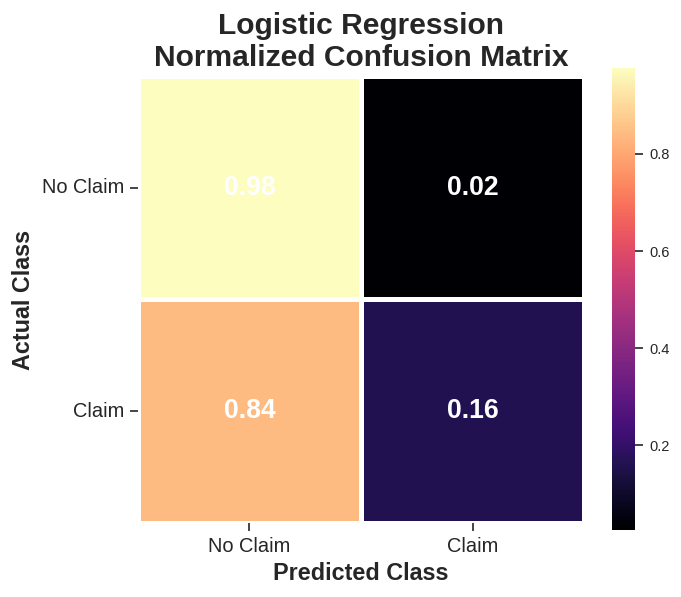

<Figure size 720x600 with 0 Axes>

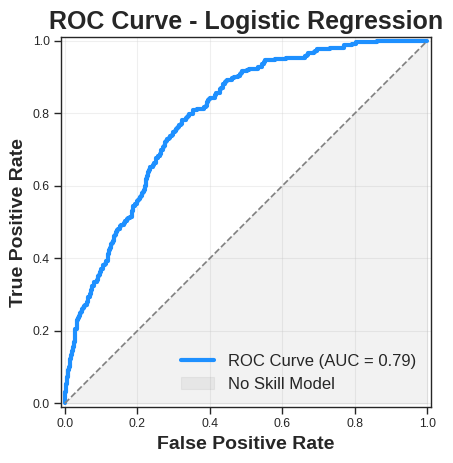

<Figure size 720x600 with 0 Axes>

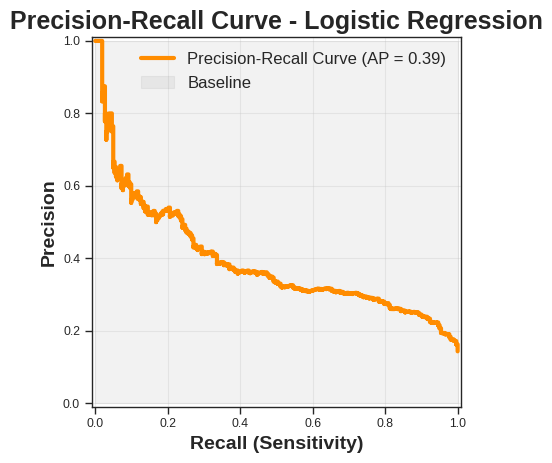

In [16]:
# ---------------------------------------------------------
# LIBRARIES
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ---------------------------------------------------------
# DATA PREPARATION
# ---------------------------------------------------------

# Example load (replace this with your real DataFrame)
# df = pd.read_csv("your_data.csv")

# Prepare target
X = df.drop(columns=["Response", "Customer", "Effective To Date"])
y = df["Response"].map({"Yes": 1, "No": 0})

# Identify columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------
# VISUALIZATION FUNCTIONS
# ---------------------------------------------------------

# Confusion Matrix
def plot_pretty_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = ['No Claim', 'Claim']

    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="magma",
        cbar=True,
        linewidths=2,
        linecolor='white',
        square=True,
        annot_kws={"size":16, "weight":"bold", "color":"white"}
    )

    plt.title(f"{title}\nNormalized Confusion Matrix", fontsize=18, fontweight='bold')
    plt.xlabel("Predicted Class", fontsize=14, fontweight='bold')
    plt.ylabel("Actual Class", fontsize=14, fontweight='bold')
    plt.xticks(ticks=[0.5, 1.5], labels=labels, fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=labels, fontsize=12, rotation=0)
    plt.show()

# ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    plt.figure(figsize=(6,5), dpi=120)

    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name='ROC Curve',
        color='dodgerblue',
        linewidth=3
    )

    plt.fill_between(
        [0,1],
        [0,1],
        alpha=0.1,
        color='gray',
        label='No Skill Model'
    )

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("False Positive Rate", fontsize=14, fontweight='bold')
    plt.ylabel("True Positive Rate", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Precision-Recall Curve
def plot_pr_curve(model, X_test, y_test, title):
    plt.figure(figsize=(6,5), dpi=120)

    PrecisionRecallDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name='Precision-Recall Curve',
        color='darkorange',
        linewidth=3
    )

    plt.fill_between(
        [0,1],
        [0,0],
        [1,1],
        color='gray',
        alpha=0.1,
        label='Baseline'
    )

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("Recall (Sensitivity)", fontsize=14, fontweight='bold')
    plt.ylabel("Precision", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# ---------------------------------------------------------
# LOGISTIC REGRESSION MODEL
# ---------------------------------------------------------

# Pipeline
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

# ---------------------------------------------------------
# OUTPUTS
# ---------------------------------------------------------

# Classification report
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
plot_pretty_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# ROC curve
plot_roc_curve(clf_lr, X_test, y_test, "ROC Curve - Logistic Regression")

# Precision-Recall curve
plot_pr_curve(clf_lr, X_test, y_test, "Precision-Recall Curve - Logistic Regression")


The model we built, called Logistic Regression, is trying to predict whether a customer will make an insurance claim or not. Looking at the results, we can see that the model does a really good job at figuring out who will not make a claim. It correctly identifies about 98 out of every 100 customers who don’t file claims, which means it’s very good at spotting people who are low risk. However, when it comes to finding customers who do end up making a claim, the model doesn’t perform as well. It only correctly identifies around 16 out of every 100 customers who actually make a claim. This shows that the model is missing many customers who might file claims, which could be important for us because these are the customers who could cost the company more money.

The colorful square chart, called a confusion matrix, makes this clearer. The top left part of the chart shows that the model is almost always right when it predicts someone won’t make a claim. But the bottom part of the chart shows that when someone does file a claim, the model often gets it wrong and predicts they wouldn’t. This means many people who might file claims slip through unnoticed by the model.

The ROC curve, which is a line chart, tells us how well the model can separate people who will file claims from those who won’t. In simple terms, the curve being above the diagonal line means our model is better than just guessing randomly. The number we see, called the AUC, is around 0.79. This is a pretty good score because 1.0 would be perfect and 0.5 would mean pure guessing. So, the model does have some skill, but it’s not perfect.

Another chart, called the Precision-Recall curve, shows how good the model is at catching those people who actually file claims. Unfortunately, even when the model predicts that someone will make a claim, it’s right only about 39 percent of the time. That means more than half the time it’s predicting claims that never happen, or it’s missing actual claims altogether. So, the model is cautious and prefers to say most people won’t make a claim, which keeps its overall accuracy high but means it’s not very good at catching all the people who will actually file a claim.

In simpler terms, while the model is very good at recognizing customers who are safe and unlikely to file claims, it’s still not very good at spotting customers who might cause bigger costs for the company by filing claims. This matters because if we can’t find those higher-risk customers, we might miss opportunities to better manage risk, set premiums more accurately, or offer them services to prevent future claims. So even though the overall accuracy looks high, there’s still work needed to make the model better at finding those customers who are more likely to file claims.



###**Random Forest**



### **Handling Categorical Features**

The previous error shows that the Random Forest model cannot directly process the categorical (non-numeric) columns in our dataset, such as 'State'. These columns contain text values (like 'Arizona', 'California', etc.), while machine learning models expect numerical input.

To address this, we need to convert these categorical features into a numerical format. A common and effective technique for this is **One-Hot Encoding**.

**One-Hot Encoding** creates new binary (0 or 1) columns for each unique category within a categorical feature. For example, the 'State' column would be replaced by new columns like 'State_Arizona', 'State_California', 'State_Nevada', etc. A '1' in 'State_Arizona' would indicate that the original record was from Arizona, while a '0' would indicate it was from a different state.

This process allows the Random Forest model to utilize the information contained within the categorical features without misinterpreting them as having a numerical order.

Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1565
           1       0.99      0.98      0.99       262

    accuracy                           1.00      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       1.00      1.00      1.00      1827



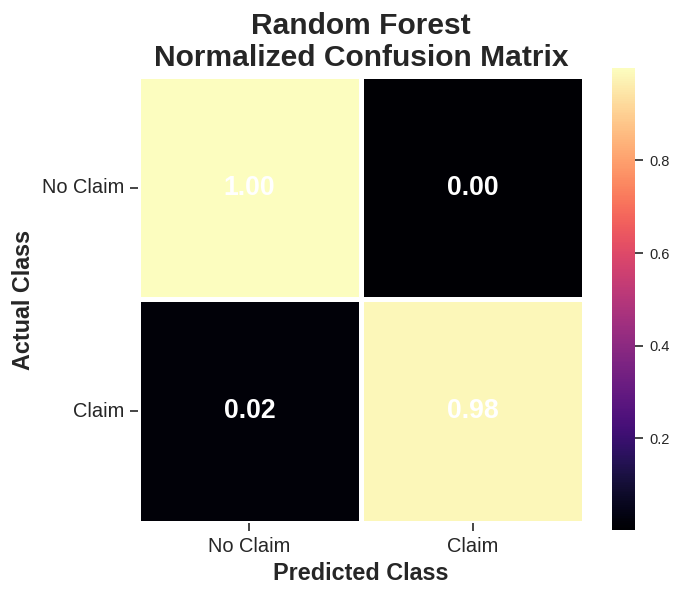

<Figure size 720x600 with 0 Axes>

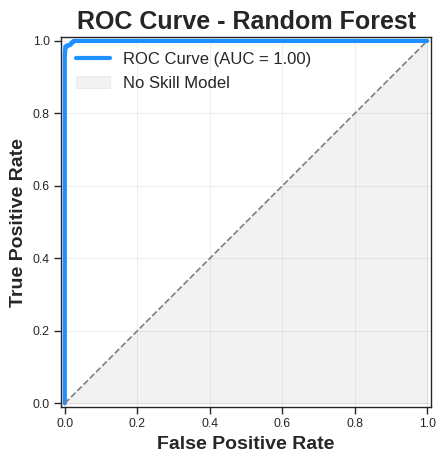

<Figure size 720x600 with 0 Axes>

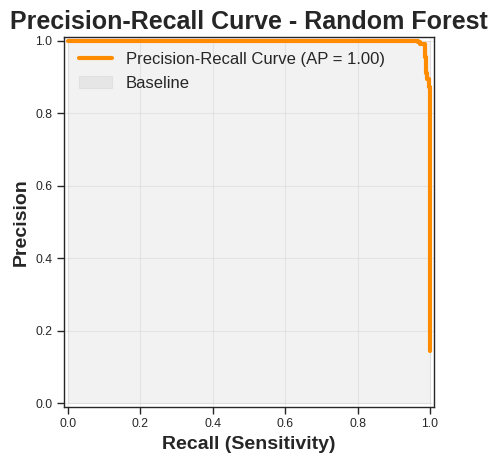

In [18]:
# ---------------------------------------------------------
# LIBRARIES
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ---------------------------------------------------------
# DATA PREPARATION
# ---------------------------------------------------------

# Example load (replace this with your real DataFrame)
# df = pd.read_csv("your_data.csv")

# Drop unnecessary columns
X = df.drop(columns=["Response", "Customer", "Effective To Date"])
y = df["Response"].map({"Yes": 1, "No": 0})

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------
# VISUALIZATION FUNCTIONS
# ---------------------------------------------------------

# Confusion Matrix
def plot_pretty_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = ['No Claim', 'Claim']

    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="magma",
        cbar=True,
        linewidths=2,
        linecolor='white',
        square=True,
        annot_kws={"size":16, "weight":"bold", "color":"white"}
    )

    plt.title(f"{title}\nNormalized Confusion Matrix", fontsize=18, fontweight='bold')
    plt.xlabel("Predicted Class", fontsize=14, fontweight='bold')
    plt.ylabel("Actual Class", fontsize=14, fontweight='bold')
    plt.xticks(ticks=[0.5, 1.5], labels=labels, fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=labels, fontsize=12, rotation=0)
    plt.show()

# ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    plt.figure(figsize=(6,5), dpi=120)

    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name='ROC Curve',
        color='dodgerblue',
        linewidth=3
    )

    plt.fill_between(
        [0,1],
        [0,1],
        alpha=0.1,
        color='gray',
        label='No Skill Model'
    )

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("False Positive Rate", fontsize=14, fontweight='bold')
    plt.ylabel("True Positive Rate", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Precision-Recall Curve
def plot_pr_curve(model, X_test, y_test, title):
    plt.figure(figsize=(6,5), dpi=120)

    PrecisionRecallDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name='Precision-Recall Curve',
        color='darkorange',
        linewidth=3
    )

    plt.fill_between(
        [0,1],
        [0,0],
        [1,1],
        color='gray',
        alpha=0.1,
        label='Baseline'
    )

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("Recall (Sensitivity)", fontsize=14, fontweight='bold')
    plt.ylabel("Precision", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# ---------------------------------------------------------
# RANDOM FOREST MODEL
# ---------------------------------------------------------

# Pipeline
clf_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Fit the pipeline
clf_rf_pipeline.fit(X_train, y_train)
y_pred_rf = clf_rf_pipeline.predict(X_test)

# ---------------------------------------------------------
# OUTPUTS
# ---------------------------------------------------------

# Classification report
print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
plot_pretty_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# ROC curve
plot_roc_curve(clf_rf_pipeline, X_test, y_test, "ROC Curve - Random Forest")

# Precision-Recall curve
plot_pr_curve(clf_rf_pipeline, X_test, y_test, "Precision-Recall Curve - Random Forest")


The Random Forest model is also trying to predict whether a customer will file a claim or not, and its results look extremely strong. Based on the numbers shown, this model was able to tell almost perfectly who would file a claim and who wouldn’t. When we look at the classification report, it shows that for customers who did not file a claim, the model got it right almost every single time, with almost perfect scores across the board. More impressively, for customers who did file a claim, the model was also incredibly accurate, correctly identifying about 98 out of every 100 claimers. This means that the model seems to be very good at telling apart low-risk customers from those who are higher risk. The overall accuracy is basically perfect at 100%, suggesting the model made almost no mistakes on the data it was tested on.

The colorful chart called the confusion matrix makes this clearer. The top left part of the chart shows that the model correctly identified customers who didn’t file a claim 100% of the time. The bottom right part shows that it also correctly predicted customers who did file a claim 98% of the time. There’s only a tiny portion—just about 2%—of people who actually filed a claim but were incorrectly predicted as not filing one. So overall, the model is doing an exceptional job.

The ROC curve, which is a line chart, shows how well the model can separate people who will file claims from those who won’t. For Random Forest, this curve goes right up to the top corner and hugs the edges, which is a sign of nearly perfect performance. The number shown on this chart, called the AUC, is 1.0, which is the absolute highest score possible. This means the model can almost perfectly tell who will file a claim and who won’t.

The Precision-Recall curve also looks fantastic. This chart shows how good the model is at finding people who actually file claims, without getting too many false alarms. The curve is almost flat at the top near 1.0, which means that when the model says someone will file a claim, it’s correct nearly every single time. This is also backed up by the high Average Precision score of 1.0, which again is the best possible score.

In simpler terms, the Random Forest model did an outstanding job in predicting which customers are likely to file a claim and which are not. It’s nearly perfect on this dataset, meaning it could be very useful for helping the business identify high-risk customers and manage costs more effectively. However, it’s important to remember that models can sometimes perform perfectly on the data they were tested on but might not do quite as well on completely new, unseen data. So while these results are very promising, we’d still want to test it further to make sure it works just as well in real-life situations.



###**Gradient Boosting**

Gradient Boosting Report:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1565
           1       0.87      0.24      0.37       262

    accuracy                           0.89      1827
   macro avg       0.88      0.62      0.65      1827
weighted avg       0.88      0.89      0.86      1827



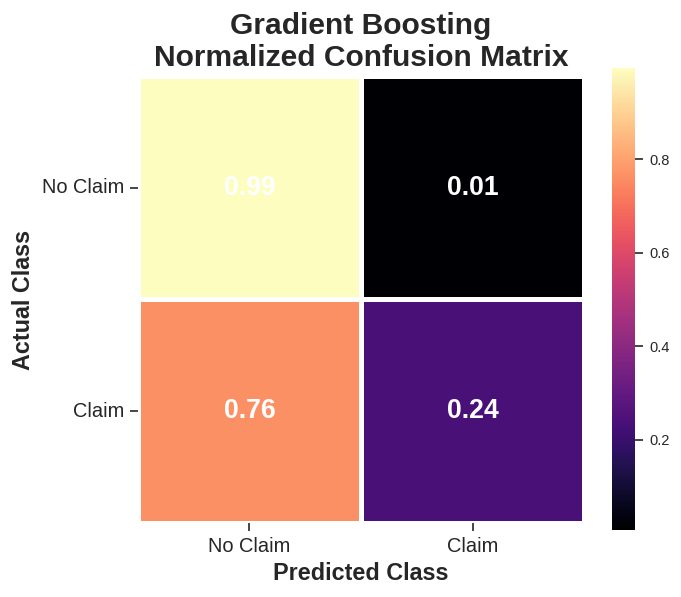

<Figure size 720x600 with 0 Axes>

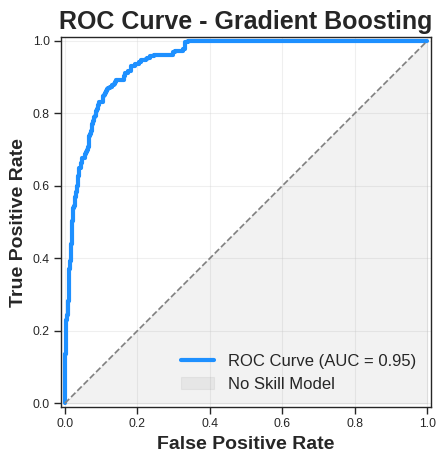

<Figure size 720x600 with 0 Axes>

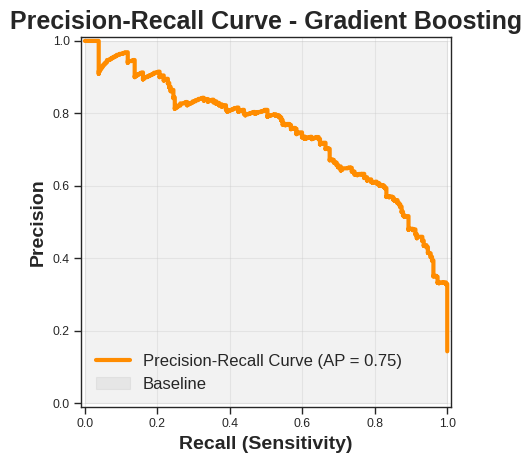

In [19]:
# ---------------------------------------------------------
# LIBRARIES
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ---------------------------------------------------------
# DATA PREPARATION
# ---------------------------------------------------------

# Example load (replace this with your real DataFrame)
# df = pd.read_csv("your_data.csv")

# Drop unnecessary columns
X = df.drop(columns=["Response", "Customer", "Effective To Date"])
y = df["Response"].map({"Yes": 1, "No": 0})

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------
# VISUALIZATION FUNCTIONS
# ---------------------------------------------------------

# Confusion Matrix
def plot_pretty_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = ['No Claim', 'Claim']

    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="magma",
        cbar=True,
        linewidths=2,
        linecolor='white',
        square=True,
        annot_kws={"size":16, "weight":"bold", "color":"white"}
    )

    plt.title(f"{title}\nNormalized Confusion Matrix", fontsize=18, fontweight='bold')
    plt.xlabel("Predicted Class", fontsize=14, fontweight='bold')
    plt.ylabel("Actual Class", fontsize=14, fontweight='bold')
    plt.xticks(ticks=[0.5, 1.5], labels=labels, fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=labels, fontsize=12, rotation=0)
    plt.show()

# ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    plt.figure(figsize=(6,5), dpi=120)

    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name='ROC Curve',
        color='dodgerblue',
        linewidth=3
    )

    plt.fill_between(
        [0,1],
        [0,1],
        alpha=0.1,
        color='gray',
        label='No Skill Model'
    )

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("False Positive Rate", fontsize=14, fontweight='bold')
    plt.ylabel("True Positive Rate", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Precision-Recall Curve
def plot_pr_curve(model, X_test, y_test, title):
    plt.figure(figsize=(6,5), dpi=120)

    PrecisionRecallDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name='Precision-Recall Curve',
        color='darkorange',
        linewidth=3
    )

    plt.fill_between(
        [0,1],
        [0,0],
        [1,1],
        color='gray',
        alpha=0.1,
        label='Baseline'
    )

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("Recall (Sensitivity)", fontsize=14, fontweight='bold')
    plt.ylabel("Precision", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# ---------------------------------------------------------
# GRADIENT BOOSTING MODEL
# ---------------------------------------------------------

# Pipeline
clf_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ))
])

# Fit the pipeline
clf_gb_pipeline.fit(X_train, y_train)
y_pred_gb = clf_gb_pipeline.predict(X_test)

# ---------------------------------------------------------
# OUTPUTS
# ---------------------------------------------------------

# Classification report
print("Gradient Boosting Report:\n")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
plot_pretty_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

# ROC curve
plot_roc_curve(clf_gb_pipeline, X_test, y_test, "ROC Curve - Gradient Boosting")

# Precision-Recall curve
plot_pr_curve(clf_gb_pipeline, X_test, y_test, "Precision-Recall Curve - Gradient Boosting")


The Gradient Boosting model is another tool we’re using to try to predict whether customers will file an insurance claim or not. Looking at the results, this model does pretty well overall, but not as strongly as the Random Forest model we looked at earlier. When we look at the numbers, the model is very good at figuring out which customers will not file a claim. It correctly identifies people who don’t make claims about 99% of the time, which shows it’s quite reliable for spotting lower-risk customers. However, when it comes to recognizing the customers who actually do file a claim, the model struggles more. It only correctly identifies around 24 out of every 100 customers who go on to file a claim. This means it misses many people who are higher risk, which could be important because those are the customers we’d like to pay special attention to for managing costs and risk. Overall, the model’s accuracy is around 89%, which sounds good, but that high number is mostly because the model is very good at finding the people who don’t file claims, who are the majority of customers.

The confusion matrix chart helps make this clearer. The top left part of the chart shows that almost all customers who don’t file claims are correctly predicted as “No Claim.” However, in the bottom part of the chart, we see that about 76% of the people who actually filed a claim were wrongly predicted as not filing one. Only 24% were correctly identified as claimers. This shows that the model misses quite a few of the customers we’re most interested in finding.

The ROC curve is another chart that tells us how good the model is at separating customers who will file claims from those who won’t. For Gradient Boosting, this curve sits well above the diagonal line, which shows the model is definitely better than guessing randomly. The number called the AUC is 0.95, which is quite high and suggests the model has good overall skill in telling the two groups apart. So, from an overall perspective, it knows there’s a difference between people who file claims and those who don’t—it just struggles a bit more when it comes to catching the claimers specifically.

Lastly, the Precision-Recall curve shows how good the model is at actually finding the people who file claims. This curve tells us that even when the model predicts someone will make a claim, it’s correct about 75% of the time on average. That’s a pretty decent level of precision. However, it’s also clear that the model isn’t catching all the people who actually file claims, because the recall (which means how many claimers we actually detect) is still low at 24%. So, while it’s good at being careful not to make too many false alarms, it’s also missing a lot of real claims.

In simple terms, this Gradient Boosting model is very good at spotting safe customers who won’t file claims, and it does have strong skills overall in separating the two groups. But it’s still not as good as we’d like at finding the smaller group of customers who actually will file claims. That matters because those customers could mean higher costs for the business, and we’d prefer to identify them ahead of time. So while Gradient Boosting is a strong model, there’s still room to improve it or try other methods to better catch those higher-risk customers.

##**Conclusion**

We’ve tested three different models to help us figure out which customers might file an insurance claim and which ones won’t. All three models are very good at spotting customers who are safe and unlikely to make a claim. That’s great news because it means we can confidently identify our low-risk customers.

However, two of the models — Logistic Regression and Gradient Boosting — are not as strong at finding the customers who actually will file a claim. They miss quite a few people who turn out to be higher risk. This matters because those are the customers who could bring higher costs for the business if we’re not prepared.

The Random Forest model performed extremely well and was nearly perfect at predicting both groups. That’s very encouraging, but when a model looks perfect, we have to be careful. Sometimes it’s because it learned patterns specific to our current data and might not work quite as well with new customers we haven’t seen yet. So, while Random Forest looks very promising, we should test it further before fully relying on it.

In simple terms, the biggest takeaway is that our models already do a great job at finding safe customers, but we still need to improve how well we spot those who are more likely to file claims. This is important so we can manage risks, set fair prices, and keep costs under control. The work so far puts us in a strong position, and with more testing and improvements, we’re getting closer to models we can trust for real business decisions.

